(2.3)=
## 2.3 Data Exploration Report

In this section, we will explore the data and present our findings:

* Statistics: basic descriptive statistics for each feature (mean, median, range, standard deviation, etc.).
* Visualizations: charts or graphs that help understand the data better. These might include histograms, scatter plots, box plots, etc.
* Initial findings: any interesting insights gained from the data, potential relationships between features, or patterns in the data.
* Potential hypotheses: based on our initial exploration, propose hypotheses about the data that could be tested or investigated further in the data mining process.

(2.3.1)=
### 2.3.1 File access and save paths
Here we will import the helper functions and setup up the save paths for the data and figures that are generated.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import math
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
from matplotlib.font_manager import FontProperties

# Register the font
font_path = r"C:\Users\carro\AppData\Local\Microsoft\Windows\Fonts\derailed-regular-webfont.ttf"  # Change this to your font file's path
font_properties = FontProperties(fname=font_path)
font_name = "Derailed"

# Set fonts globally
font_name = "Derailed"
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = font_name
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["mathtext.fontset"] = "stix"

# create the file paths for reading in data and for outputting figures and tables
DATA_PATH = "../data/saville_row_east_west/"
OUTPUT_TABLES_PATH = "../output/tables/2.3/"
OUTPUT_FIGURES_PATH = "../output/figures/2.3/"

os.makedirs(DATA_PATH, exist_ok=True)
os.makedirs(OUTPUT_TABLES_PATH, exist_ok=True)
os.makedirs(OUTPUT_FIGURES_PATH, exist_ok=True)

# get custom color palette and colormap
from eda_helper import get_custom_palette, get_custom_colormap

custom_palette = get_custom_palette()
custom_colormap = get_custom_colormap()

# read in the files for exploration
east_df = pd.read_pickle(os.path.join(DATA_PATH, "east_df.pkl"))
west_df = pd.read_pickle(os.path.join(DATA_PATH, "west_df.pkl"))

east_df = east_df

For each timestamp at each sensor we get a value assigned to one of two trajectories. As this level of detail is too great we will aggregate the data for each sensor on the timestamp and sum the values yielding the total bi-directional flow. 

In [3]:
west_agg_df = (
    west_df.groupby("dt")
    .agg(
        {
            "value": "sum",
            "veh_class": "first",
            "location": "first",
            "category": "first",
            "key": "first",
            "date": "first",
            "time": "first",
            "hour-minutes": "first",
            "year-month-day-hour": "first",
            "year-month-hour": "first",
            "month-hour": "first",
            "year-month": "first",
            "day_of_week-hour-minutes": "first",
            "year-week": "first",
            "hours_since_midnight": "first",
            "minutes_since_midnight": "first",
            "year-quarter": "first",
            "month": "first",
            "quarter": "first",
            "day_in_week": "first",
            "day_of_week": "first",
        }
    )
    .reset_index()
)

east_agg_df = (
    east_df.groupby("dt")
    .agg(
        {
            "value": "sum",
            "veh_class": "first",
            "location": "first",
            "category": "first",
            "key": "first",
            "date": "first",
            "time": "first",
            "hour-minutes": "first",
            "year-month-day-hour": "first",
            "year-month-hour": "first",
            "month-hour": "first",
            "year-month": "first",
            "day_of_week-hour-minutes": "first",
            "year-week": "first",
            "hours_since_midnight": "first",
            "minutes_since_midnight": "first",
            "year-quarter": "first",
            "month": "first",
            "quarter": "first",
            "day_in_week": "first",
            "day_of_week": "first",
        }
    )
    .reset_index()
)

If we look at some of the descriptive statistics we can see some differences between the east and west facing sensors. We will focus our exploratory analysis on the `value` attribute which shows the number of people detected in the last 15-minutes. The total data counts are very similar but it is evident there is some disparity in the value of the means. We can see that the east facing sensor is more skewed towards zero than the west facing sensor. 

In [4]:
east_ped_counts_descriptive = east_agg_df["value"].describe().round(1)
west_ped_counts_descriptive = west_agg_df["value"].describe().round(1)
print("East - Value")
display(pd.DataFrame(east_ped_counts_descriptive))
print("West - Value")
display(pd.DataFrame(west_ped_counts_descriptive))

East - Value


,value
count,39904.0
mean,153.2
std,202.3
min,0.0
25%,15.0
50%,60.0
75%,222.0
max,3547.0


West - Value


,value
count,40099.0
mean,198.9
std,266.6
min,0.0
25%,16.0
50%,80.0
75%,280.0
max,4415.0


In [5]:
east_ped_counts_descriptive.to_csv(
    os.path.join(
        OUTPUT_TABLES_PATH,
        "East sensor descriptive statistics for pedestrian count.csv",
    )
)
west_ped_counts_descriptive.to_csv(
    os.path.join(
        OUTPUT_TABLES_PATH,
        "West sensor descriptive statistics for pedestrian count.csv",
    )
)

In [6]:
# sorts east_df by hour and minute of the day
east_sorted_df = east_agg_df.sort_values("time")

# groups on year-month-day-hour and yields sum (total pedestrians per hour)
east_hour_of_the_day_sum_df = (
    east_sorted_df.groupby("year-month-day-hour")
    .agg(
        {
            "value": "sum",
            "hours_since_midnight": "first",
            "time": "first",
            "year-month": "first",
            "month": "first",
            "month-hour": "first",
        }
    )
    .sort_values("hours_since_midnight")
    .reset_index()
)

# groups and sums on month-hour and yield mean (average pedestrians per hour in each month)
east_hour_month_average_df = (
    east_hour_of_the_day_sum_df.groupby("month-hour")
    .agg({"value": "mean", "hours_since_midnight": "first", "month": "first"})
    .sort_values("hours_since_midnight")
    .reset_index()
)

# sorts west_df by hour and minute of the day
west_sorted_df = west_agg_df.sort_values("time")

# groups on year-month-day-hour and yields sum (total pedestrians per hour)
west_hour_of_the_day_sum_df = (
    west_sorted_df.groupby("year-month-day-hour")
    .agg(
        {
            "value": "sum",
            "hours_since_midnight": "first",
            "time": "first",
            "year-month": "first",
            "month": "first",
            "month-hour": "first",
        }
    )
    .sort_values("hours_since_midnight")
    .reset_index()
)

# groups and sums on month-hour and yield mean (average pedestrians per hour in each month)
west_hour_month_average_df = (
    west_hour_of_the_day_sum_df.groupby("month-hour")
    .agg({"value": "mean", "hours_since_midnight": "first", "month": "first"})
    .sort_values("hours_since_midnight")
    .reset_index()
)

(2.3.2)=
### 2.3.2 Overview of Flow Patterns

(2.3.2.1)=
#### 2.3.2.1 Average flow per hour by month
The following graph shows the variation in average flow for each month at each hour of the day. We can see that there is a large difference in flow between the east and west sensor, this suggests that the west side the street is generally busier than the east side (~ 30% more usage throughout the year). This could be due to a greater utility of the retail on west side of the street. 

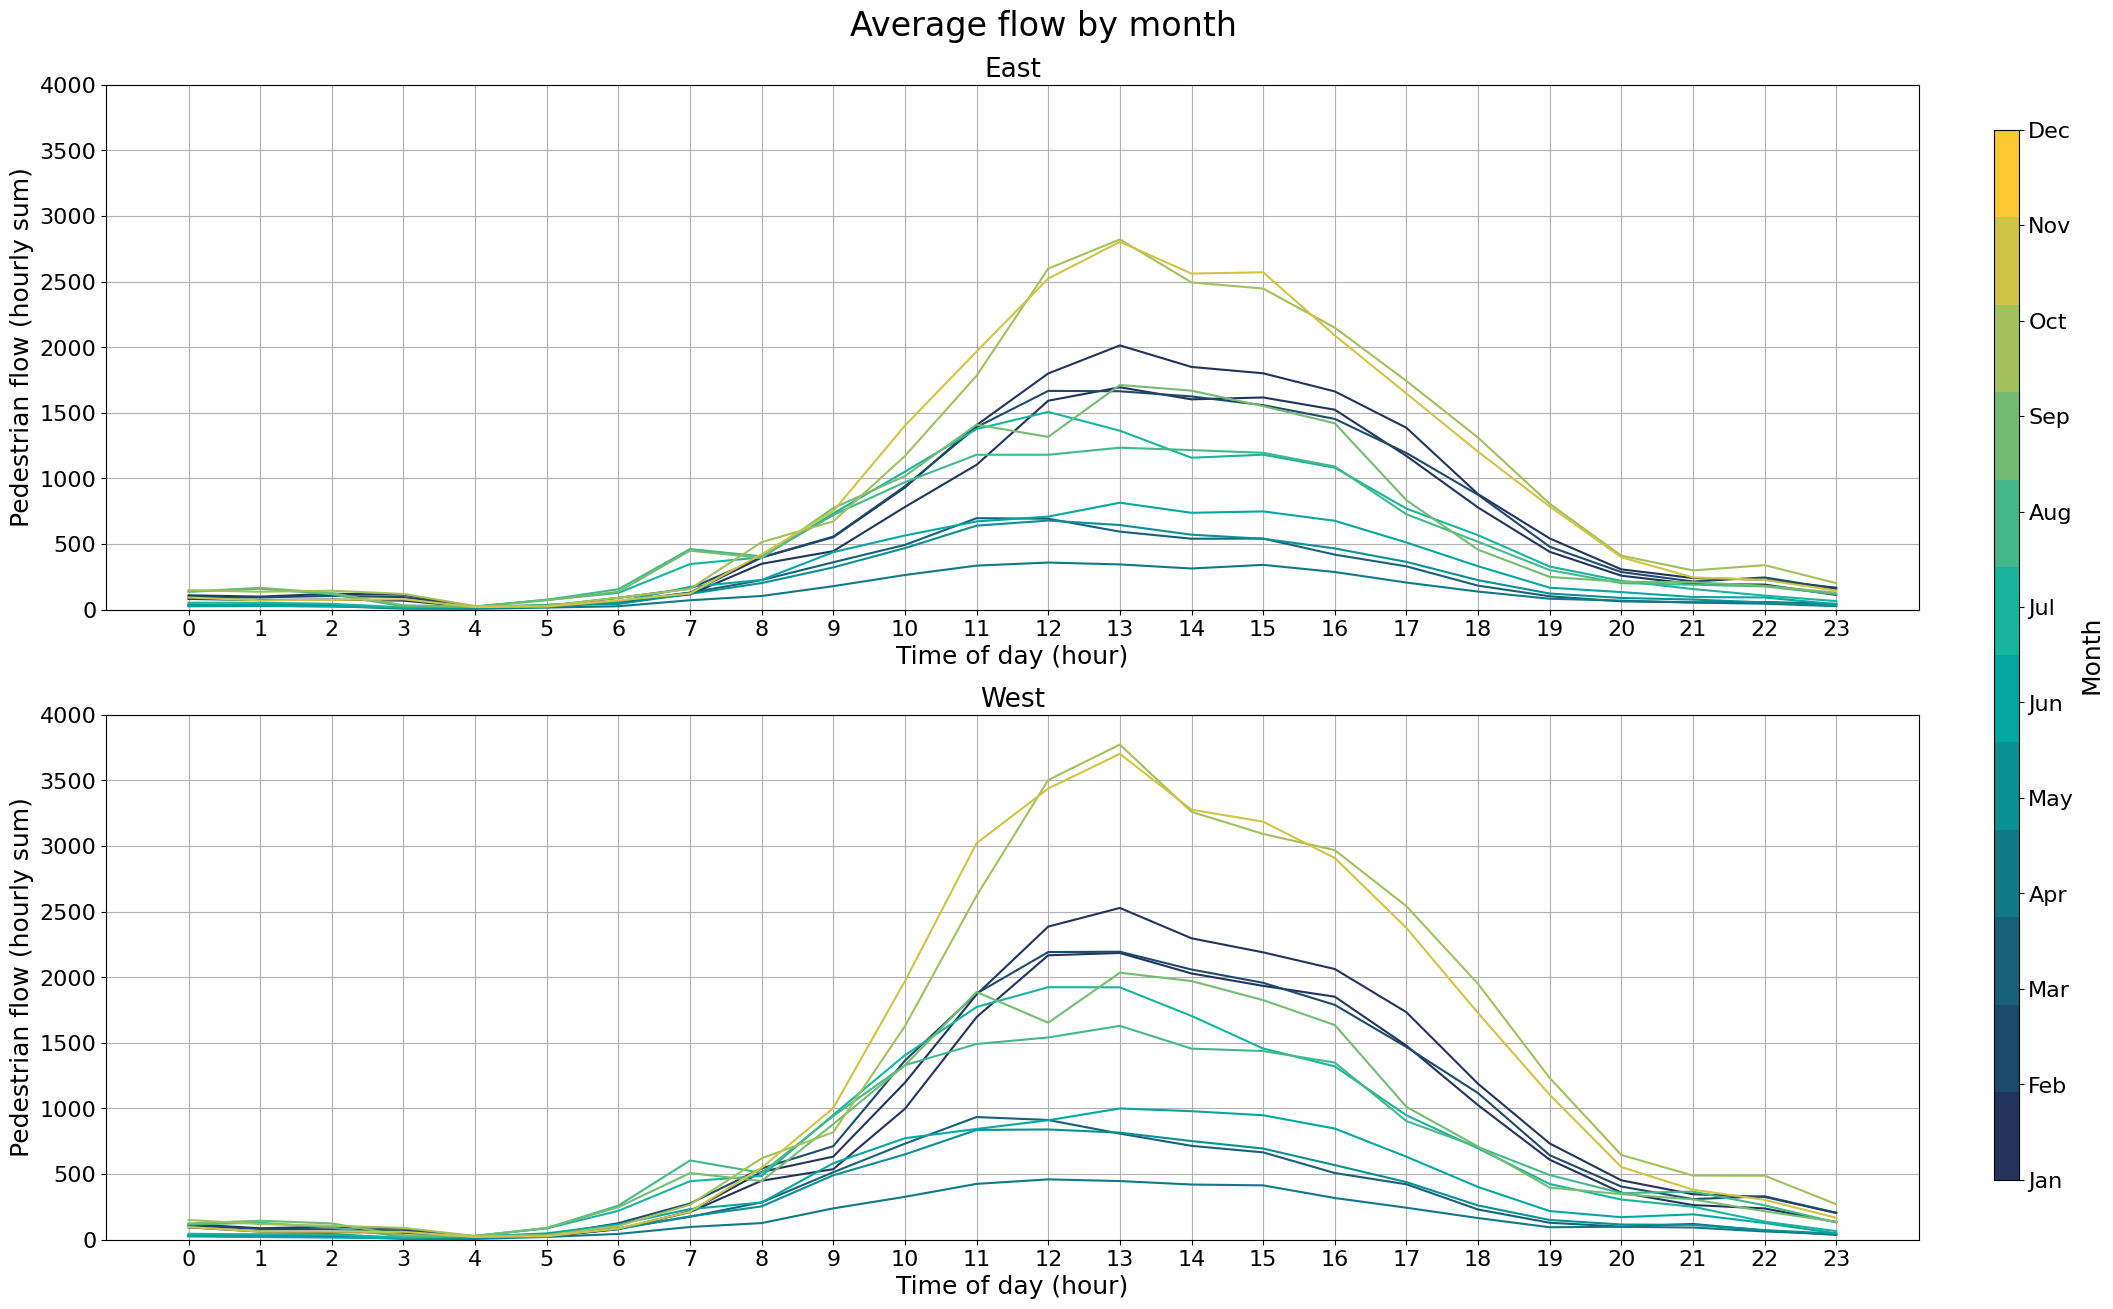

In [7]:
import matplotlib

east_len_months = len(set(east_hour_month_average_df["month"]))
cmap = matplotlib.colors.ListedColormap(
    [custom_colormap(i / (east_len_months - 1)) for i in range(east_len_months)]
)

fig, ax = plt.subplots(2, 1, figsize=(25, 15), gridspec_kw={"hspace": 0.2})

# loop through each unique month value for east
for i, month in enumerate(set(east_hour_month_average_df["month"])):
    # filter the DataFrame for the current month
    month_df = east_hour_month_average_df[east_hour_month_average_df["month"] == month]

    # plot the line for the current month with the corresponding color from the colormap
    ax[0].plot(
        month_df["hours_since_midnight"].astype(str),
        month_df["value"],
        color=cmap(i - 1),
        label=f"Month {month}",
    )

ax[0].set_xlabel("Time of day (hour)", fontsize=18)
ax[0].set_ylabel("Pedestrian flow (hourly sum)", fontsize=18)
ax[0].tick_params(labelsize=16)
ax[0].set_title("East", fontsize=19)
ax[0].set_ylim(0, 4000)
ax[0].grid(True)

# loop through each unique month value for west
for i, month in enumerate(set(west_hour_month_average_df["month"])):
    # filter the DataFrame for the current month
    month_df = west_hour_month_average_df[west_hour_month_average_df["month"] == month]

    # plot the line for the current month with the corresponding color from the colormap
    ax[1].plot(
        month_df["hours_since_midnight"].astype(str),
        month_df["value"],
        color=cmap(i - 1),
        label=f"Month {month}",
    )

ax[1].set_xlabel("Time of day (hour)", fontsize=18)
ax[1].set_ylabel("Pedestrian flow (hourly sum)", fontsize=18)
ax[1].tick_params(labelsize=16)
ax[1].set_title("West", fontsize=19)
ax[1].set_ylim(0, 4000)
ax[1].grid(True)

fig.suptitle("Average flow by month", fontsize=24, y=0.93)
fig.subplots_adjust(right=0.85)  # create some space on the right side for the colorbar

cbar_ax = fig.add_axes(
    [0.88, 0.15, 0.01, 0.7]
)  # position of colorbar [left, bottom, width, height]

# add a colorbar to show the mapping of colors to months
norm = matplotlib.colors.Normalize(vmin=1, vmax=east_len_months)
cbar = fig.colorbar(
    matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=cbar_ax,
    ticks=np.arange(1, east_len_months + 1),
)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_yticklabels(
    ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)
cbar.set_label("Month", fontsize=18)

plt.savefig(
    os.path.join(OUTPUT_FIGURES_PATH, "Average flow per hour by month.svg"),
    bbox_inches="tight",
)
plt.show()

```{figure} graphics\east_and_west_sensors.png
:name: east-west-sensors

East and west facing sensors on northumberland street
```

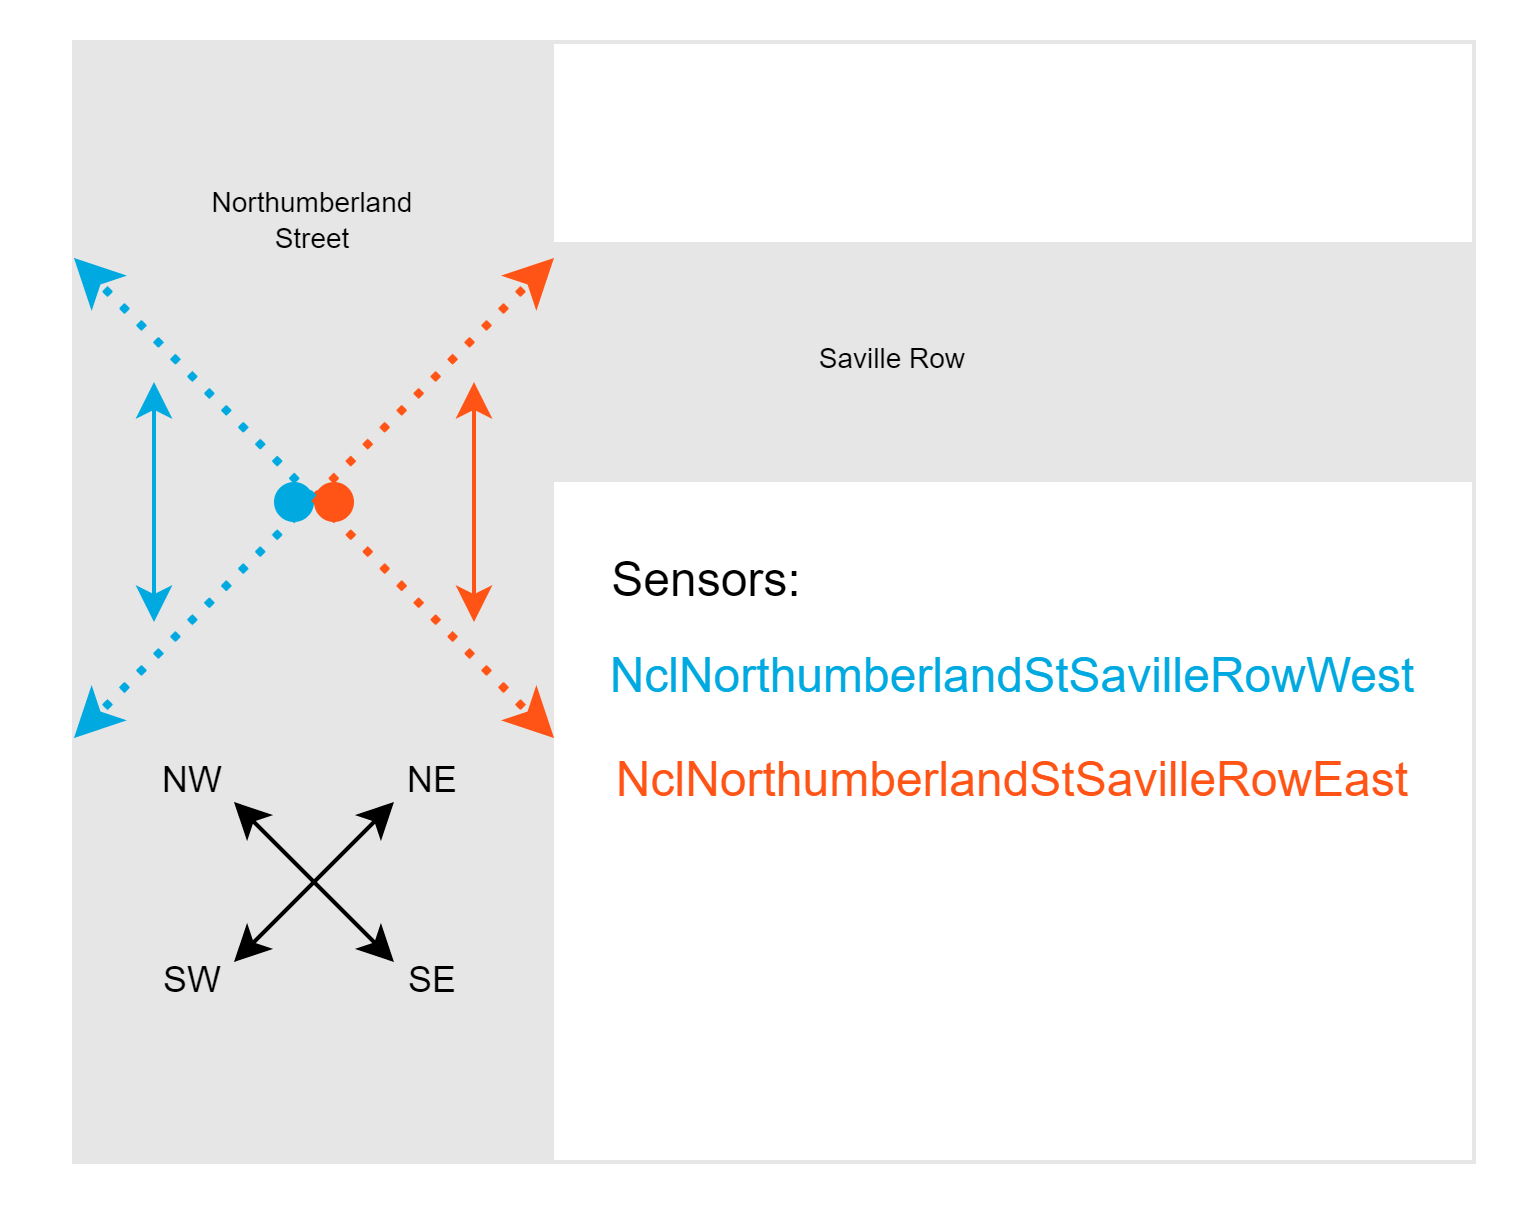

In [8]:
from IPython import display
import os

display.Image(
    os.path.join(os.getcwd(), "graphics\east_and_west_sensors.png"),
    width=768,
    height=768,
)

(2.3.2.2)=
#### 2.3.2.2 Flow per hour by month and quarter with mean trendline
The following graph shows the variation in flow throughout the day and across each month and each quarter over a 15 minute period this time. A couple of things are of note here. The first is that there appears to be a a significant difference in the average flow for different months with December and November experiencing far greater average flow than in May and June. The y-axis has been limited to 1000, but outliers exist up to 1750 pedestrians per 15 minute period (see section 2.4).It is also worth noting that by grouping into quarters the general pattern shown in the monthly grouping is retained. 

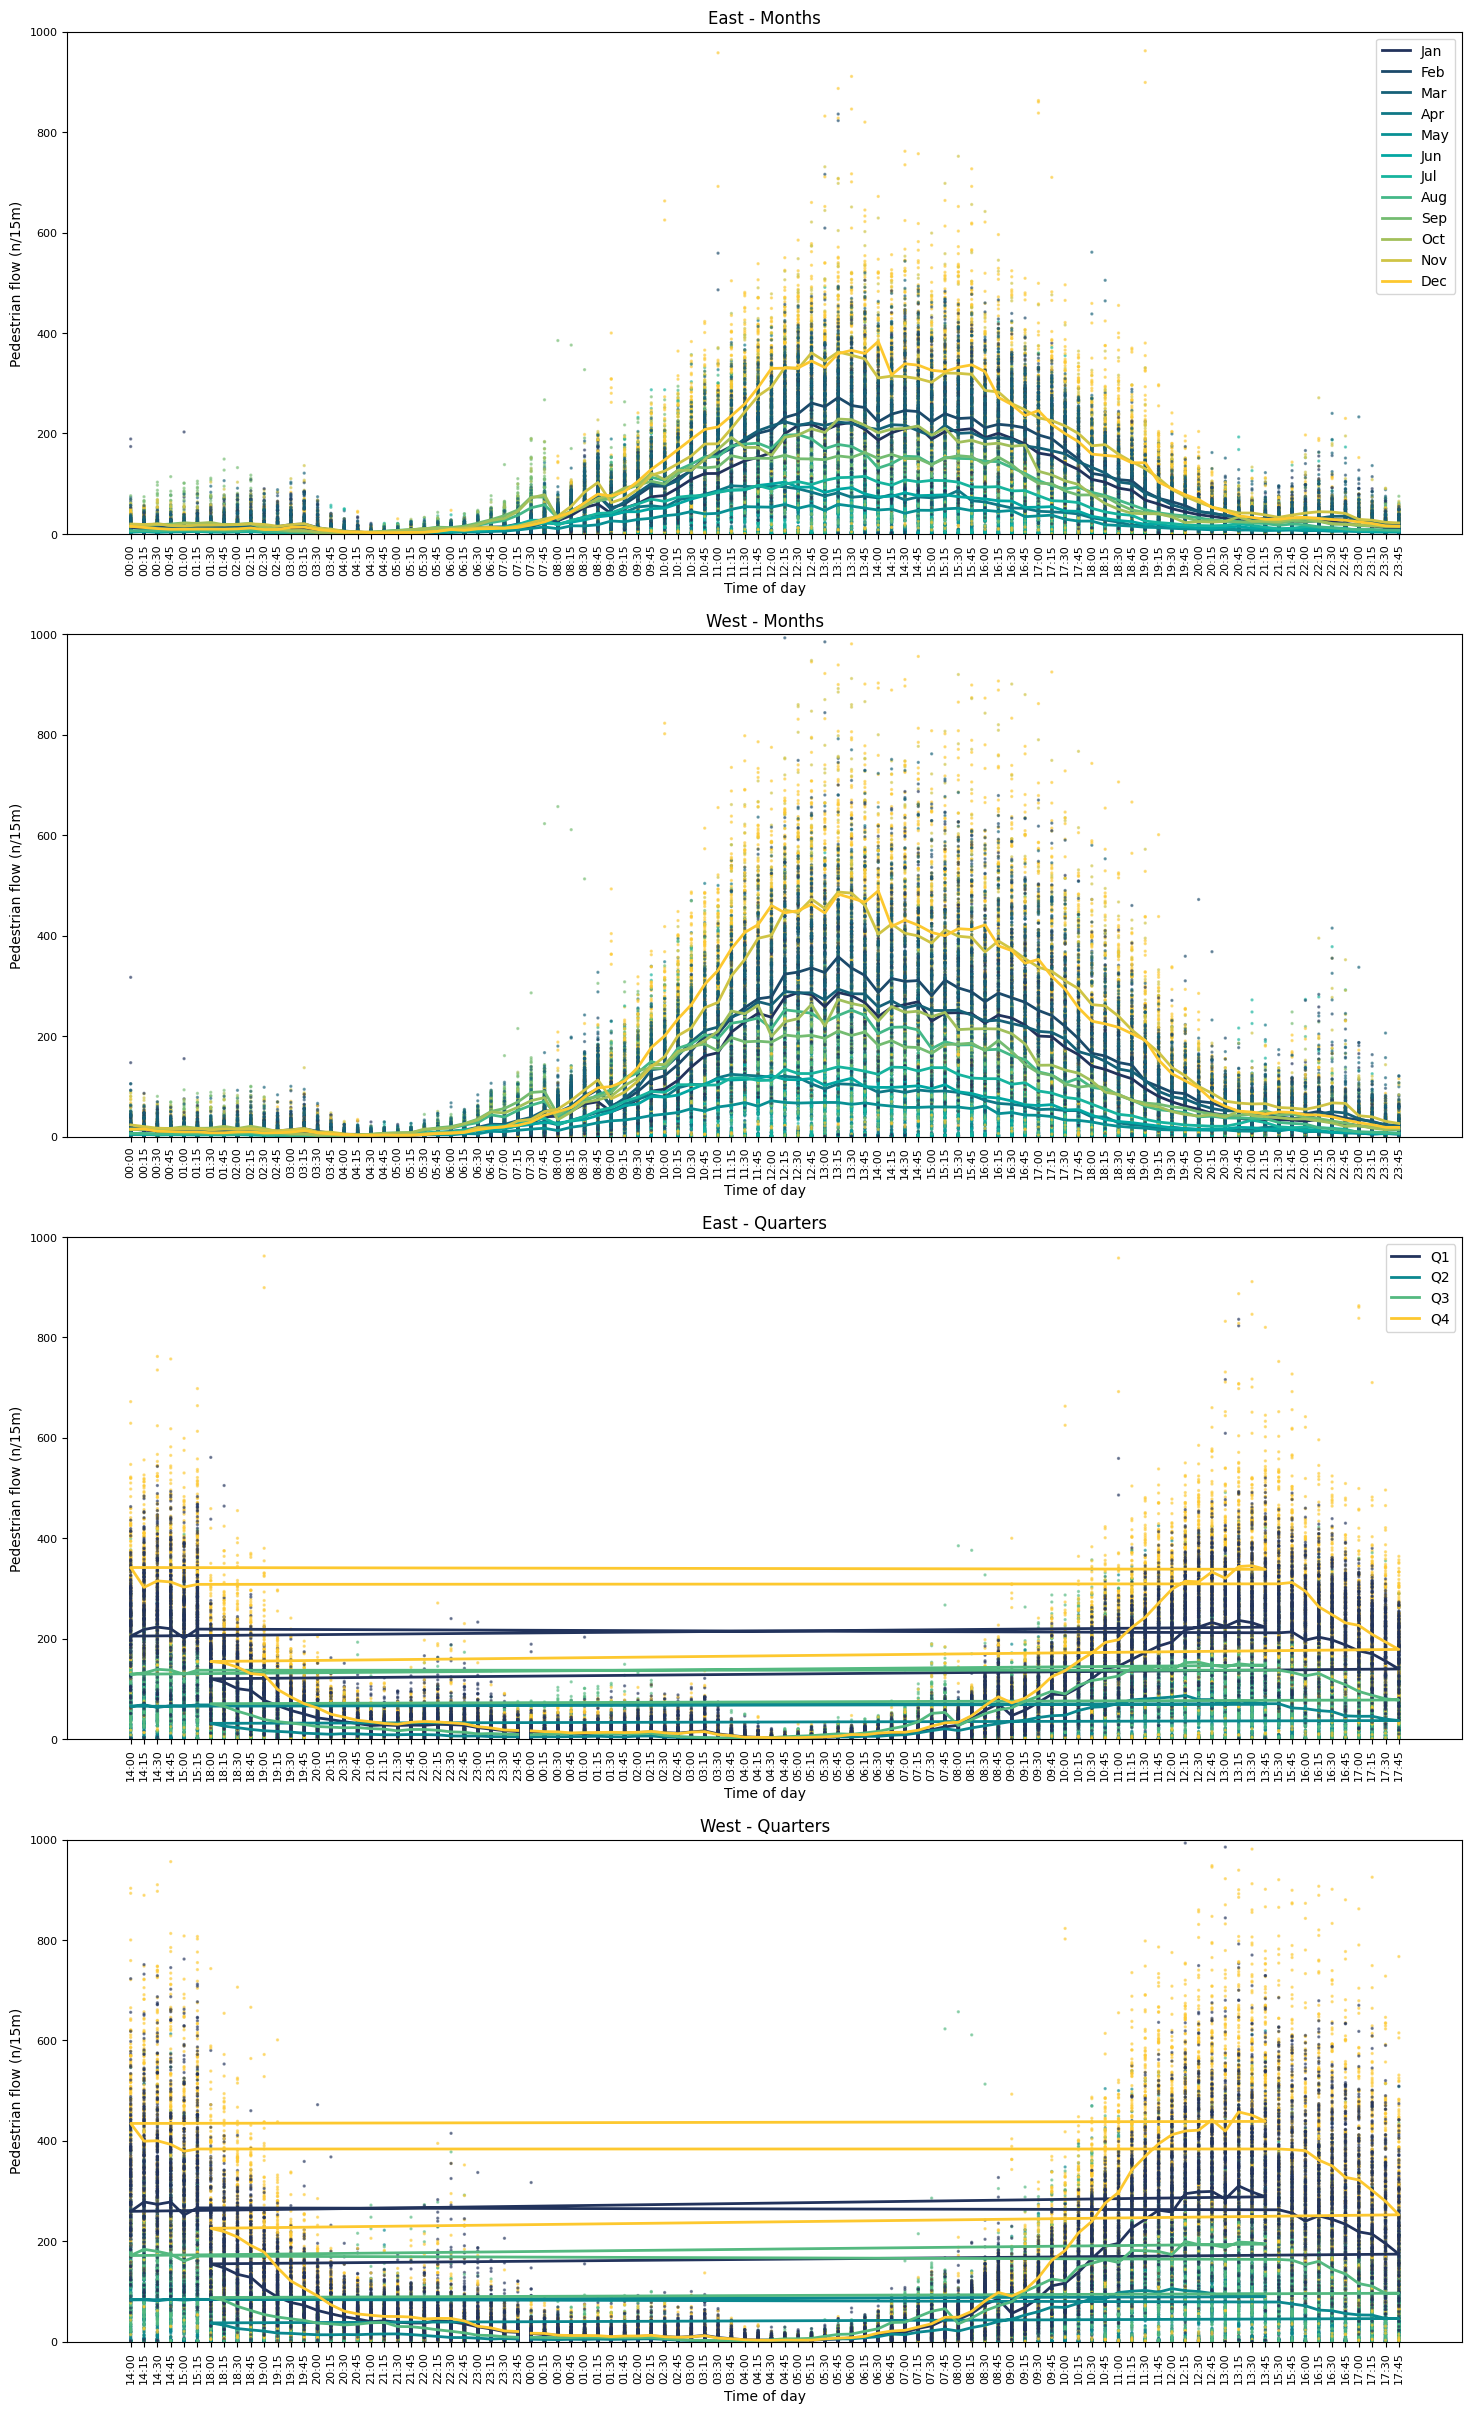

In [9]:
############### Months

# instantiate the color map and reverse it so it matches the legend order
cmap = matplotlib.colors.ListedColormap([custom_colormap(i / 11) for i in range(12)])

# For East
east_monthly_interval_mean_df = (
    east_df.groupby(["month", "hour-minutes"])["value"].mean().reset_index()
)

# For West
west_monthly_interval_mean_df = (
    west_df.groupby(["month", "hour-minutes"])["value"].mean().reset_index()
)

fig, ax = plt.subplots(4, 1, figsize=(18, 30))
fig.subplots_adjust(hspace=0.2)

month_names = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

for month in range(1, 13):
    # For East
    month_data = east_monthly_interval_mean_df[
        east_monthly_interval_mean_df["month"] == month
    ]
    ax[0].plot(
        month_data["hour-minutes"].astype(str),
        month_data["value"],
        linewidth=2,
        label=f"{month_names[month - 1]}",
        color=cmap.colors[month - 1],
    )
    # For West
    month_data = west_monthly_interval_mean_df[
        west_monthly_interval_mean_df["month"] == month
    ]
    ax[1].plot(
        month_data["hour-minutes"].astype(str),
        month_data["value"],
        linewidth=2,
        label=f"{month_names[month - 1]}",
        color=cmap.colors[month - 1],
    )

ax[0].legend()

sc = ax[0].scatter(
    x=east_df["hour-minutes"].astype(str),
    y=east_df["value"],
    c=east_df["month"],
    cmap=cmap,
    alpha=0.5,
    s=2,
)
sc = ax[1].scatter(
    x=west_df["hour-minutes"].astype(str),
    y=west_df["value"],
    c=west_df["month"],
    cmap=cmap,
    alpha=0.5,
    s=2,
)

ax[0].tick_params(axis="x", rotation=90)
ax[0].set_xlabel("Time of day")
ax[0].set_ylabel("Pedestrian flow (n/15m)")
ax[0].tick_params(labelsize=8)
ax[0].set_ylim(0, 1000)
ax[0].set_title("East - Months")
ax[1].tick_params(axis="x", rotation=90)
ax[1].set_xlabel("Time of day")
ax[1].set_ylabel("Pedestrian flow (n/15m)")
ax[1].tick_params(labelsize=8)
ax[1].set_title("West - Months")
ax[1].set_ylim(0, 1000)

############### Quarters

# instantiate the color map and reverse it so it matches the legend order
cmap = matplotlib.colors.ListedColormap([custom_colormap(i / 3) for i in range(4)])

# For East
east_quarter_interval_mean_df = (
    east_df.groupby(["quarter", "hour-minutes"])["value"].mean().reset_index()
)
# For West
west_quarter_interval_mean_df = (
    west_df.groupby(["quarter", "hour-minutes"])["value"].mean().reset_index()
)

sc = ax[2].scatter(
    x=east_df["hour-minutes"].astype(str),
    y=east_df["value"],
    c=east_df["quarter"],
    cmap=cmap,
    alpha=0.5,
    s=2,
)
sc = ax[3].scatter(
    x=west_df["hour-minutes"].astype(str),
    y=west_df["value"],
    c=west_df["quarter"],
    cmap=cmap,
    alpha=0.5,
    s=2,
)

for quarter in range(1, 5):
    # For East
    quarter_data = east_quarter_interval_mean_df[
        east_quarter_interval_mean_df["quarter"] == quarter
    ]
    ax[2].plot(
        quarter_data["hour-minutes"].astype(str),
        quarter_data["value"],
        linewidth=2,
        label=f"Q{quarter}",
        color=cmap.colors[quarter - 1],
    )
    # For West
    quarter_data = west_quarter_interval_mean_df[
        west_quarter_interval_mean_df["quarter"] == quarter
    ]
    ax[3].plot(
        quarter_data["hour-minutes"].astype(str),
        quarter_data["value"],
        linewidth=2,
        label=f"Q{quarter}",
        color=cmap.colors[quarter - 1],
    )

ax[2].legend()

ax[2].tick_params(axis="x", rotation=90)
ax[2].set_xlabel("Time of day")
ax[2].set_ylabel("Pedestrian flow (n/15m)")
ax[2].tick_params(labelsize=8)
ax[2].set_title("East - Quarters")
ax[2].set_ylim(0, 1000)
ax[3].tick_params(axis="x", rotation=90)
ax[3].set_xlabel("Time of day")
ax[3].set_ylabel("Pedestrian flow (n/15m)")
ax[3].tick_params(labelsize=8)
ax[3].set_title("West - Quarters")
ax[3].set_ylim(0, 1000)
################ Save both figs

plt.savefig(
    os.path.join(OUTPUT_FIGURES_PATH, "East_and_West_total_Flow_per_15_Min_Period.svg"),
    bbox_inches="tight",
)
plt.show()

Let's have a look at the the top 10 flow measurements and their datetime value.

Text(0.5, 0.98, 'Occurences of 100 largest pedestrains flows by time')

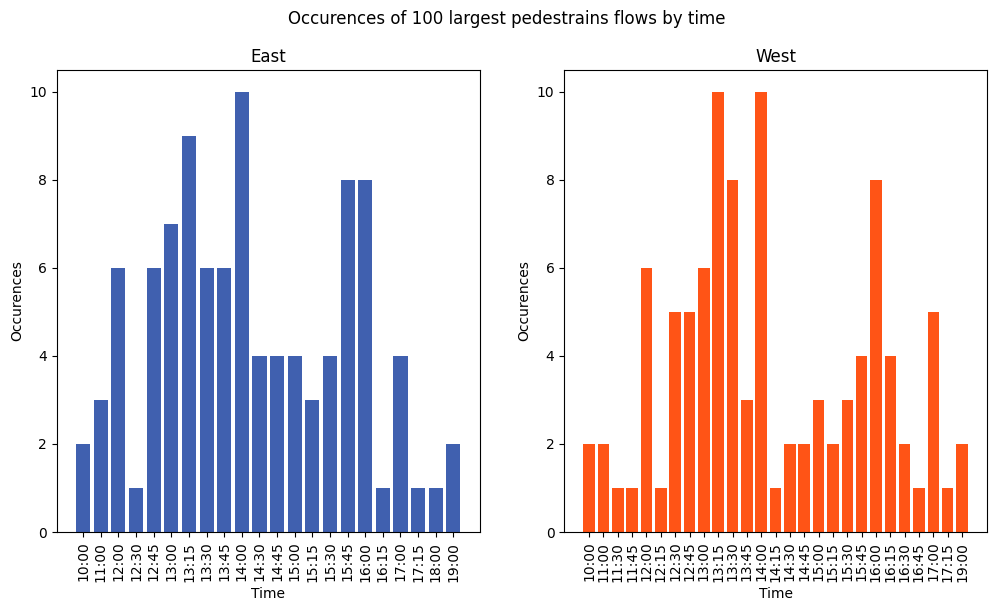

In [10]:
east_largest_100 = east_df.nlargest(100, "value")
east_larget_100_tod = east_largest_100.groupby("hour-minutes").agg({"value": "count"})

west_largest_100 = west_df.nlargest(100, "value")
west_larget_100_tod = west_largest_100.groupby("hour-minutes").agg({"value": "count"})

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(
    east_larget_100_tod.index.astype(str),
    east_larget_100_tod["value"],
    color=custom_palette[0],
)
ax[0].tick_params(axis="x", labelrotation=90)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Occurences")
ax[0].set_title("East")

ax[1].bar(
    west_larget_100_tod.index.astype(str),
    west_larget_100_tod["value"],
    color=custom_palette[1],
)
ax[1].tick_params(axis="x", labelrotation=90)
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Occurences")
ax[1].set_title("West")

fig.suptitle("Occurences of 100 largest pedestrains flows by time")

Text(0.5, 0.98, 'Occurences of 100 largest pedestrains flows by date')

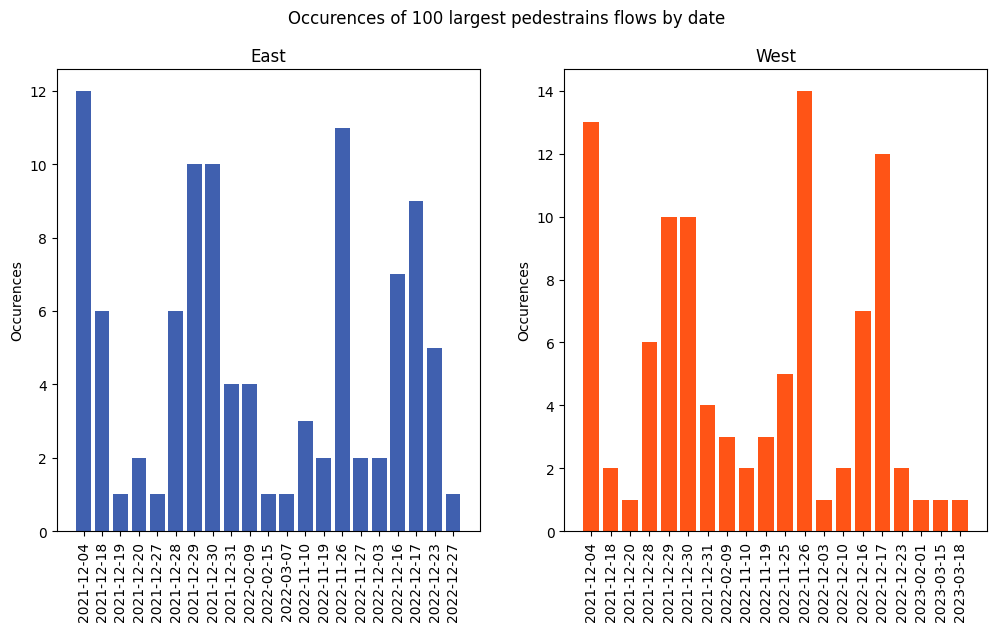

In [11]:
east_largest_100 = east_df.nlargest(100, "value")
east_largest_100_results = east_largest_100.groupby("date").agg({"value": "count"})

west_largest_100 = west_df.nlargest(100, "value")
west_largest_100_results = west_largest_100.groupby("date").agg({"value": "count"})

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(
    east_largest_100_results.index.astype(str),
    east_largest_100_results["value"],
    color=custom_palette[0],
)
ax[0].tick_params(axis="x", labelrotation=90)
ax[0].set_ylabel("Occurences")
ax[0].set_title("East")

ax[1].bar(
    west_largest_100_results.index.astype(str),
    west_largest_100_results["value"],
    color=custom_palette[1],
)
ax[1].tick_params(axis="x", labelrotation=90)
ax[1].set_ylabel("Occurences")
ax[1].set_title("West")

fig.suptitle("Occurences of 100 largest pedestrains flows by date")

In [12]:
east_largest_100.to_csv(os.path.join(OUTPUT_TABLES_PATH, "NSSRE_top_100.csv"))
west_largest_100.to_csv(os.path.join(OUTPUT_TABLES_PATH, "NSSRW_top_100.csv"))

(2.3.2.3)=
#### 2.3.2.3 Weekday vs Weekend flow per hour by quarter with mean trendline


In [13]:
east_agg_df.columns

Index(['dt', 'value', 'veh_class', 'location', 'category', 'key', 'date',
       'time', 'hour-minutes', 'year-month-day-hour', 'year-month-hour',
       'month-hour', 'year-month', 'day_of_week-hour-minutes', 'year-week',
       'hours_since_midnight', 'minutes_since_midnight', 'year-quarter',
       'month', 'quarter', 'day_in_week', 'day_of_week'],
      dtype='object')

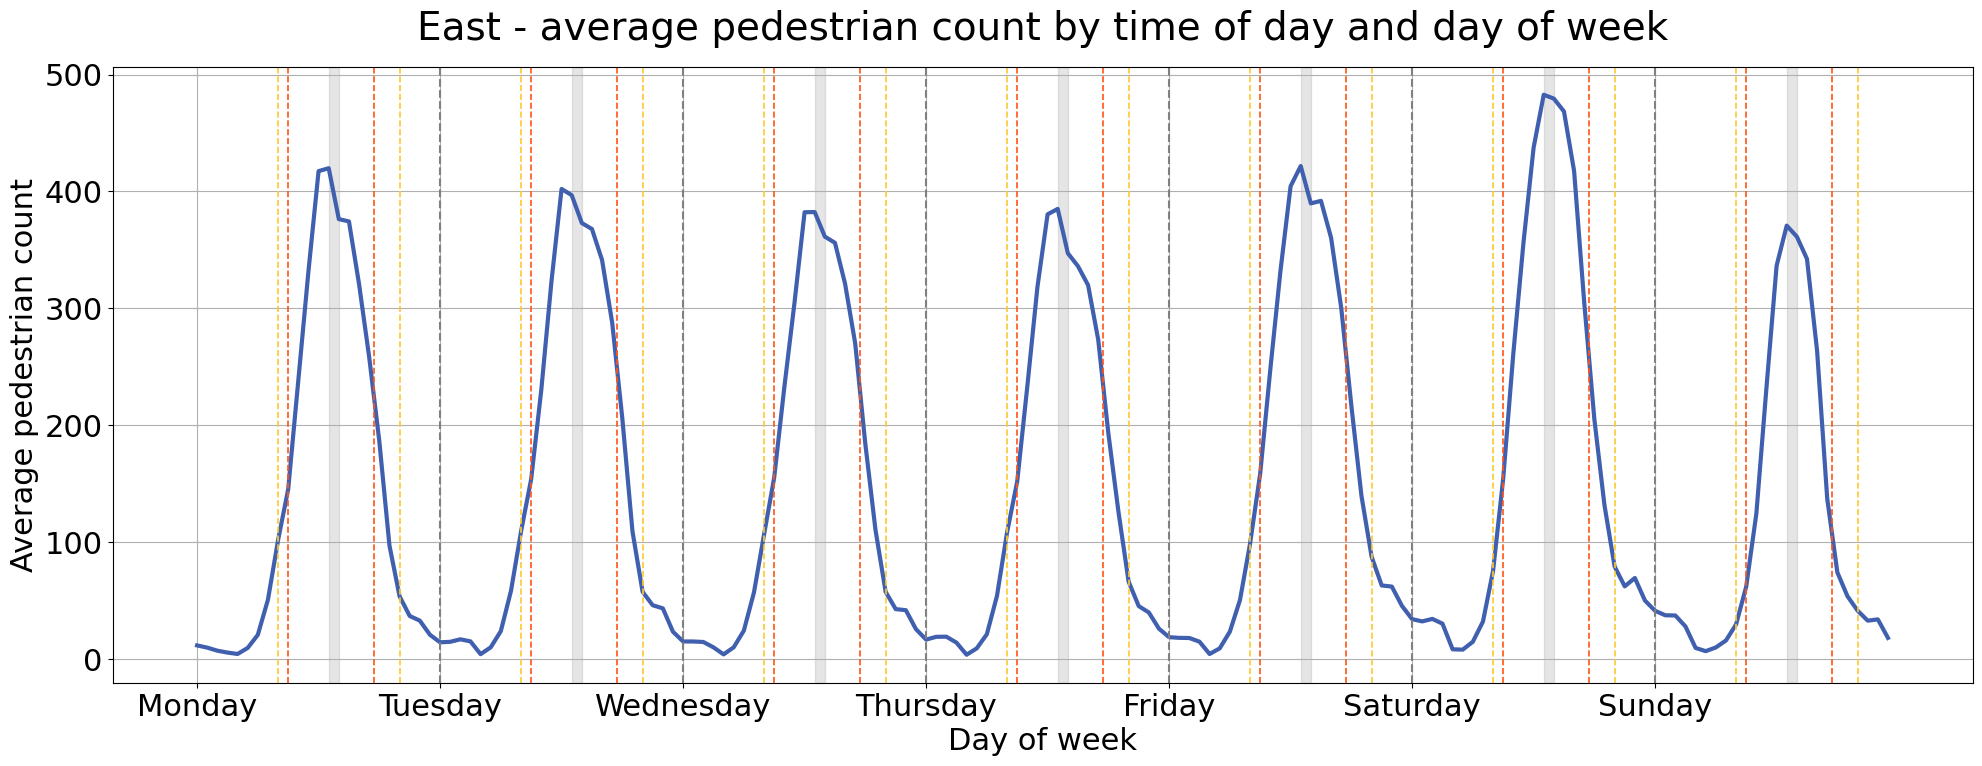

In [14]:
east_hour_of_day_by_day_of_week_df = east_agg_df.groupby(
    ["day_of_week", "hour-minutes"]
).agg(
    {
        "value": "mean",
        "day_of_week": "first",
        "hours_since_midnight": "first",
        "day_in_week": "first",
    }
)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# calculate 'minutes_since_week_start' using 'day_in_week' instead of 'day_of_week_num'
east_hour_of_day_by_day_of_week_df["minutes_since_week_start"] = (
    east_hour_of_day_by_day_of_week_df["day_in_week"] * 24 * 60
    + east_hour_of_day_by_day_of_week_df["hours_since_midnight"] * 60
)

# create figure and axis
fig, ax = plt.subplots(figsize=(24, 8))

# line plot
sns.lineplot(
    data=east_hour_of_day_by_day_of_week_df,
    x="minutes_since_week_start",
    y="value",
    color=custom_palette[0],
    ax=ax,
    errorbar=None,
    legend=False,
    linewidth=3,
)

# format x-axis
ax.set_xticks(np.arange(0, 7 * 24 * 60, 24 * 60))  # daily ticks
ax.set_xticklabels(days)  # display days of week

# vertical lines for every day
for i in range(1, 7):
    ax.axvline(i * 24 * 60, color="gray", linestyle="--")

# additional vertical lines at 9am and 5.30pm every day
for i in range(7):
    ax.axvline(
        (i * 24 + 8) * 60, color=custom_palette[2], linestyle="--", linewidth=1.2
    )  # 8am
    ax.axvline(
        (i * 24 + 9) * 60, color=custom_palette[1], linestyle="--", linewidth=1.2
    )  # 9am
    ax.axvline(
        (i * 24 + 17.5) * 60, color=custom_palette[1], linestyle="--", linewidth=1.2
    )  # 5.30pm
    ax.axvline(
        (i * 24 + 20) * 60, color=custom_palette[2], linestyle="--", linewidth=1.2
    )

# shaded rectangle between 1pm and 2pm every day
for i in range(7):
    ax.axvspan(
        (i * 24 + 13) * 60, (i * 24 + 14) * 60, alpha=0.2, color="gray"
    )  # 1pm-2pm

plt.title(
    "East - average pedestrian count by time of day and day of week",
    fontsize=28,
    y=1.03,
)
plt.xlabel("Day of week", fontsize=22)
plt.ylabel("Average pedestrian count", fontsize=22)
plt.grid(True)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

In [15]:
# create a mask for weekdays (monday-friday)
weekday_mask = east_agg_df["dt"].dt.weekday < 5

# create seperate dataframes for weekdays and weekends
weekday_east_df = east_agg_df[weekday_mask]
weekend_east_df = east_agg_df[-weekday_mask]

# create a mask for weekdays (monday-friday)
weekday_mask = west_agg_df["dt"].dt.weekday < 5

# create seperate dataframes for weekdays and weekends
weekday_west_df = west_agg_df[weekday_mask]
weekend_west_df = west_agg_df[-weekday_mask]

The following graph shows the mean variation in flow throughout the day and across each quarter for weekdays and weekend. From visual inspection it is clear that there is a variation in the shape of the trendline when comparing the same quarter in both graphs for weekday vs weekend. 

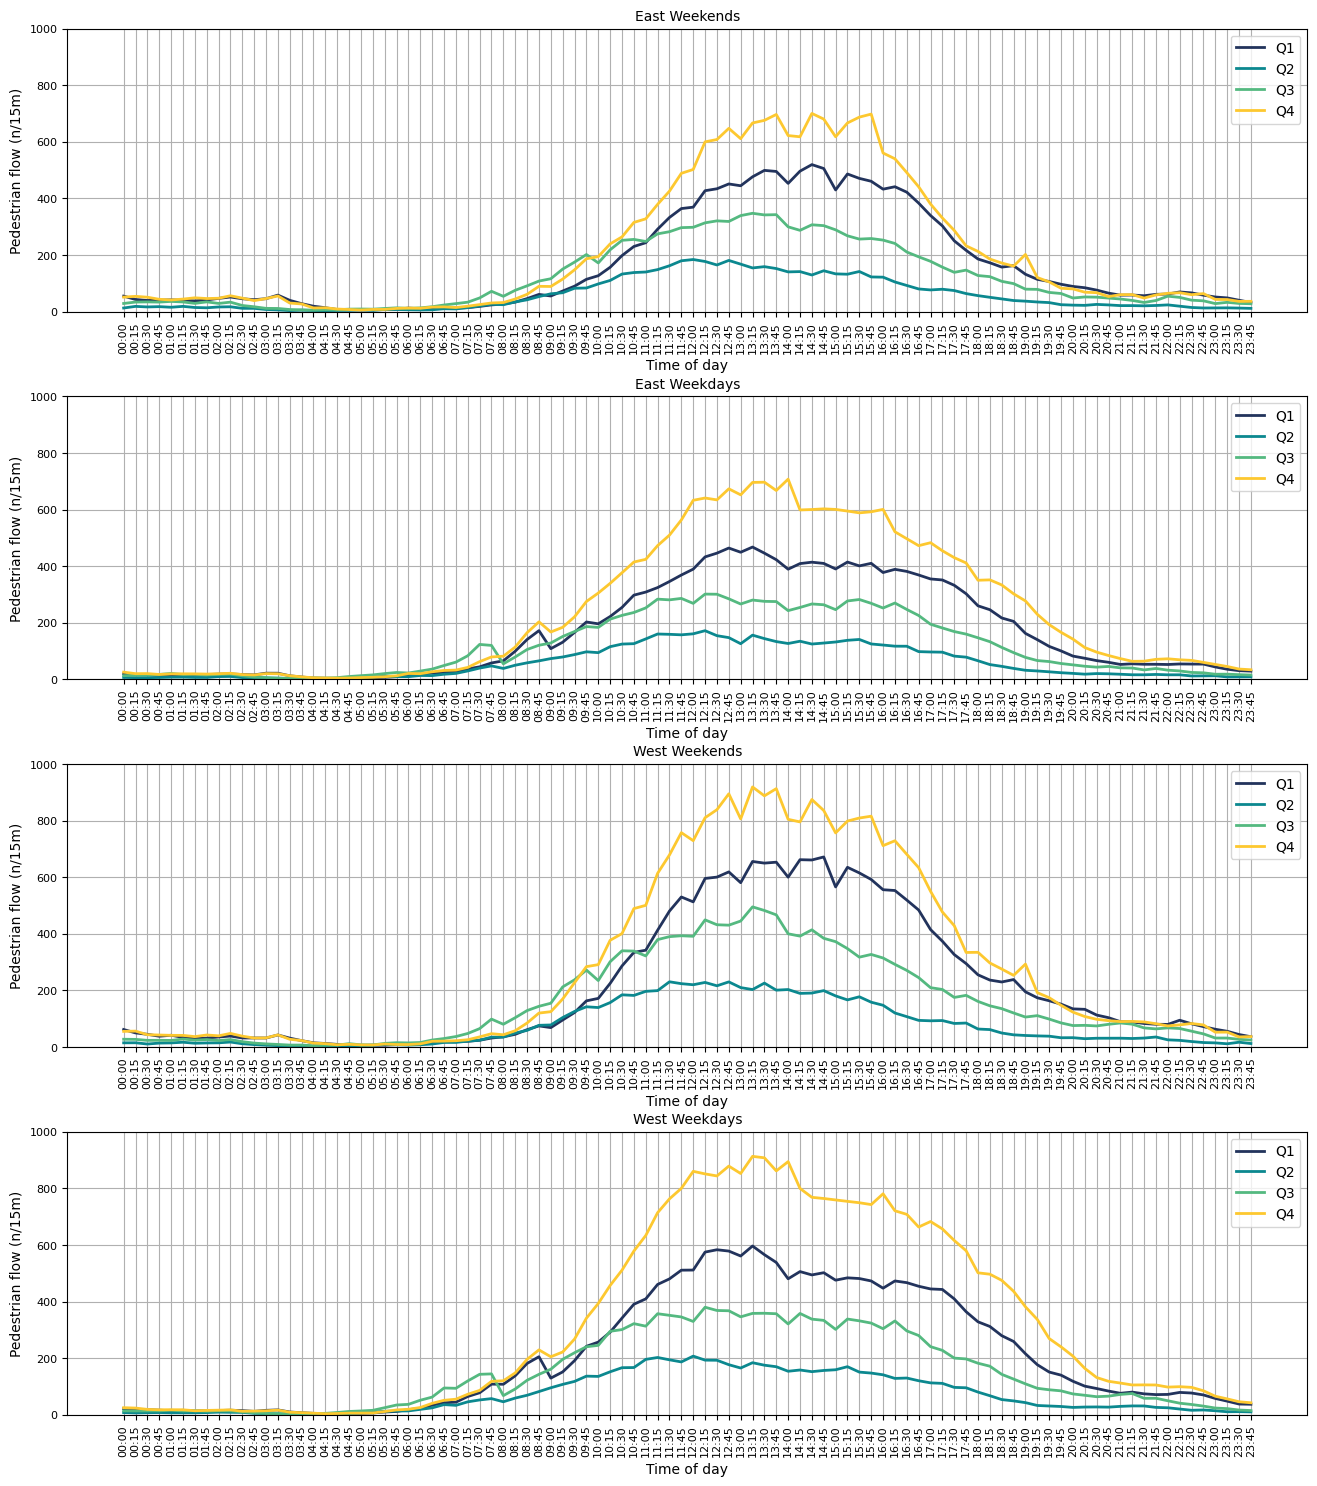

In [16]:
# instantiate the color map and reverse it so it matches the legend order
cmap = matplotlib.colors.ListedColormap([custom_colormap(i / 3) for i in range(4)])

fig, ax = plt.subplots(4, 1, figsize=(16, 18))
fig.subplots_adjust(hspace=0.3)

# For East Weekends
east_quarter_interval_mean_df = (
    weekend_east_df.groupby(["quarter", "hour-minutes"])["value"].mean().reset_index()
)
# For West Weekends
west_quarter_interval_mean_df = (
    weekend_west_df.groupby(["quarter", "hour-minutes"])["value"].mean().reset_index()
)

max_value = max(
    east_quarter_interval_mean_df["value"].max(),
    west_quarter_interval_mean_df["value"].max(),
)
ylim = math.ceil(max_value / 100) * 100

for quarter in range(1, 5):
    # For East
    quarter_data = east_quarter_interval_mean_df[
        east_quarter_interval_mean_df["quarter"] == quarter
    ]
    ax[0].plot(
        quarter_data["hour-minutes"].astype(str),
        quarter_data["value"],
        linewidth=2,
        label=f"Q{quarter}",
        color=cmap.colors[quarter - 1],
    )
    # For West
    quarter_data = west_quarter_interval_mean_df[
        west_quarter_interval_mean_df["quarter"] == quarter
    ]
    ax[2].plot(
        quarter_data["hour-minutes"].astype(str),
        quarter_data["value"],
        linewidth=2,
        label=f"Q{quarter}",
        color=cmap.colors[quarter - 1],
    )

ax[0].legend()
ax[2].legend()

ax[0].tick_params(axis="x", rotation=90)
ax[0].set_title("East Weekends", fontsize=10)
ax[0].set_xlabel("Time of day")
ax[0].set_ylabel("Pedestrian flow (n/15m)")
ax[0].set_ylim(0, ylim)
ax[0].tick_params(labelsize=8)
ax[0].grid(True)

ax[2].tick_params(axis="x", rotation=90)
ax[2].set_title("West Weekends", fontsize=10)
ax[2].set_xlabel("Time of day")
ax[2].set_ylabel("Pedestrian flow (n/15m)")
ax[2].set_ylim(0, ylim)
ax[2].tick_params(labelsize=8)
ax[2].grid(True)

# For East Weekdays
east_quarter_interval_mean_df = (
    weekday_east_df.groupby(["quarter", "hour-minutes"])["value"].mean().reset_index()
)
# For West Weekdays
west_quarter_interval_mean_df = (
    weekday_west_df.groupby(["quarter", "hour-minutes"])["value"].mean().reset_index()
)

for quarter in range(1, 5):
    # For East
    quarter_data = east_quarter_interval_mean_df[
        east_quarter_interval_mean_df["quarter"] == quarter
    ]
    ax[1].plot(
        quarter_data["hour-minutes"].astype(str),
        quarter_data["value"],
        linewidth=2,
        label=f"Q{quarter}",
        color=cmap.colors[quarter - 1],
    )
    # For West
    quarter_data = west_quarter_interval_mean_df[
        west_quarter_interval_mean_df["quarter"] == quarter
    ]
    ax[3].plot(
        quarter_data["hour-minutes"].astype(str),
        quarter_data["value"],
        linewidth=2,
        label=f"Q{quarter}",
        color=cmap.colors[quarter - 1],
    )

ax[1].legend()
ax[3].legend()

ax[1].tick_params(axis="x", rotation=90)
ax[1].set_title("East Weekdays", fontsize=10)
ax[1].set_xlabel("Time of day")
ax[1].set_ylabel("Pedestrian flow (n/15m)")
ax[1].set_ylim(0, ylim)
ax[1].tick_params(labelsize=8)
ax[1].grid(True)

ax[3].tick_params(axis="x", rotation=90)
ax[3].set_title("West Weekdays", fontsize=10)
ax[3].set_xlabel("Time of day")
ax[3].set_ylabel("Pedestrian flow (n/15m)")
ax[3].set_ylim(0, ylim)
ax[3].tick_params(labelsize=8)
ax[3].grid(True)

plt.savefig(
    os.path.join(
        OUTPUT_FIGURES_PATH,
        "Weekday_and_Weekend_Total_Flow_per_15_Min_Period_by_Quarter.svg",
    ),
    bbox_inches="tight",
)
plt.show()

(2.3.3)=
### 2.3.3 Properties of flow patterns

(2.3.3.1)=
#### 2.3.3.1 Pattern properties of quarterly mean trendlines

To investigate the differences between weekdays and weekends, we will generate some metrics that describe the properties of the mean curves and compare them. The metrics we will use are:
* Area Under Curve (AUC)
* Peak Time and Peak Value
* Width at Half Maximum (WHM)

In [17]:
from scipy import integrate

# initialize list to store metrics DataFrames for weekends and weekdays
east_weekend_metrics = []
east_weekday_metrics = []

east_quarter_interval_mean_df = (
    weekend_east_df.groupby(["quarter", "minutes_since_midnight"])["value"]
    .mean()
    .reset_index()
)

# compute metrics for each quarter and add to DataFrame for weekends
for quarter in range(1, 5):
    quarter_data = east_quarter_interval_mean_df[
        east_quarter_interval_mean_df["quarter"] == quarter
    ]
    auc = integrate.trapz(
        quarter_data["value"], dx=15
    )  # dx time interval is 15 minutes
    peak_time = quarter_data["minutes_since_midnight"][quarter_data["value"].idxmax()]
    peak_value = quarter_data["value"].max()
    whm_time_range = quarter_data["minutes_since_midnight"][
        (quarter_data["value"] >= peak_value / 2)
    ]
    whm = (
        whm_time_range.max() - whm_time_range.min()
    )  # calculate WHM as (minutes_since_midnight is a numeric value)
    east_weekend_metrics.append(
        pd.DataFrame(
            {
                "quarter": [f"Q{quarter}"],
                "AUC": [auc],
                "peak_time": [peak_time],
                "peak_value": [peak_value],
                "WHM": [whm],
            }
        )
    )

# similarly, for weekdays
east_quarter_interval_mean_df = (
    weekday_east_df.groupby(["quarter", "minutes_since_midnight"])["value"]
    .mean()
    .reset_index()
)

# compute metrics for each quarter and add to DataFrame for weekdays
for quarter in range(1, 5):
    quarter_data = east_quarter_interval_mean_df[
        east_quarter_interval_mean_df["quarter"] == quarter
    ]
    auc = integrate.trapz(
        quarter_data["value"], dx=15
    )  # dx time interval is 15 minutes
    peak_time = quarter_data["minutes_since_midnight"][quarter_data["value"].idxmax()]
    peak_value = quarter_data["value"].max()
    whm_time_range = quarter_data["minutes_since_midnight"][
        (quarter_data["value"] >= peak_value / 2)
    ]
    whm = (
        whm_time_range.max() - whm_time_range.min()
    )  # calculate WHM as (minutes_since_midnight is a numeric value)
    east_weekday_metrics.append(
        pd.DataFrame(
            {
                "quarter": [f"Q{quarter}"],
                "AUC": [auc],
                "peak_time": [peak_time],
                "peak_value": [peak_value],
                "WHM": [whm],
            }
        )
    )

# concatenate the list of dataframes to a single dataframe
east_weekend_metrics = pd.concat(east_weekend_metrics, ignore_index=True)
east_weekday_metrics = pd.concat(east_weekday_metrics, ignore_index=True)

print("East Weekend Metrics: ")
print(east_weekend_metrics)
print("East Weekday Metrics: ")
print(east_weekday_metrics)

East Weekend Metrics: 
  quarter            AUC  peak_time  peak_value  WHM
0      Q1  233955.683449        870  519.591837  360
1      Q2   84282.521342        720  184.047619  390
2      Q3  171983.393723        795  347.461538  450
3      Q4  300223.288758        870  700.461538  345
East Weekday Metrics: 
  quarter            AUC  peak_time  peak_value  WHM
0      Q1  237483.713212        795  467.531746  465
1      Q2   83323.590064        735  171.807692  465
2      Q3  166164.746109        735  301.206349  510
3      Q4  342589.570880        840  707.590909  435


In [18]:
weekend_west_df

,dt,value,veh_class,location,category,key,date,time,hour-minutes,year-month-day-hour,...,year-month,day_of_week-hour-minutes,year-week,hours_since_midnight,minutes_since_midnight,year-quarter,month,quarter,day_in_week,day_of_week
126,2021-12-04 00:00:00,96,person,NclNorthumberlandStSavilleRowWest,flow,2021-12,2021-12-04,1900-01-01 00:00:00,00:00,2021-12-04 00,...,2021-12,Saturday 00:00,2021-48,0,0,2021-4,12,4,5,Saturday
127,2021-12-04 00:15:00,84,person,NclNorthumberlandStSavilleRowWest,flow,2021-12,2021-12-04,1900-01-01 00:15:00,00:15,2021-12-04 00,...,2021-12,Saturday 00:15,2021-48,0,15,2021-4,12,4,5,Saturday
128,2021-12-04 00:30:00,76,person,NclNorthumberlandStSavilleRowWest,flow,2021-12,2021-12-04,1900-01-01 00:30:00,00:30,2021-12-04 00,...,2021-12,Saturday 00:30,2021-48,0,30,2021-4,12,4,5,Saturday
129,2021-12-04 00:45:00,51,person,NclNorthumberlandStSavilleRowWest,flow,2021-12,2021-12-04,1900-01-01 00:45:00,00:45,2021-12-04 00,...,2021-12,Saturday 00:45,2021-48,0,45,2021-4,12,4,5,Saturday
130,2021-12-04 01:00:00,56,person,NclNorthumberlandStSavilleRowWest,flow,2021-12,2021-12-04,1900-01-01 01:00:00,01:00,2021-12-04 01,...,2021-12,Saturday 01:00,2021-48,1,60,2021-4,12,4,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39618,2023-03-26 22:45:00,14,person,NclNorthumberlandStSavilleRowWest,flow,2023-03,2023-03-26,1900-01-01 22:45:00,22:45,2023-03-26 22,...,2023-03,Sunday 22:45,2023-13,22,1365,2023-1,3,1,6,Sunday
39619,2023-03-26 23:00:00,10,person,NclNorthumberlandStSavilleRowWest,flow,2023-03,2023-03-26,1900-01-01 23:00:00,23:00,2023-03-26 23,...,2023-03,Sunday 23:00,2023-13,23,1380,2023-1,3,1,6,Sunday
39620,2023-03-26 23:15:00,10,person,NclNorthumberlandStSavilleRowWest,flow,2023-03,2023-03-26,1900-01-01 23:15:00,23:15,2023-03-26 23,...,2023-03,Sunday 23:15,2023-13,23,1395,2023-1,3,1,6,Sunday
39621,2023-03-26 23:30:00,7,person,NclNorthumberlandStSavilleRowWest,flow,2023-03,2023-03-26,1900-01-01 23:30:00,23:30,2023-03-26 23,...,2023-03,Sunday 23:30,2023-13,23,1410,2023-1,3,1,6,Sunday


In [19]:
# initialize list to store metrics DataFrames for weekends and weekdays
west_weekend_metrics = []
west_weekday_metrics = []

west_quarter_interval_mean_df = (
    weekend_west_df.groupby(["quarter", "minutes_since_midnight"])["value"]
    .mean()
    .reset_index()
)

# compute metrics for each quarter and add to DataFrame for weekends
for quarter in range(1, 5):
    quarter_data = west_quarter_interval_mean_df[
        west_quarter_interval_mean_df["quarter"] == quarter
    ]
    auc = integrate.trapz(
        quarter_data["value"], dx=15
    )  # dx time interval is 15 minutes
    peak_time = quarter_data["minutes_since_midnight"][quarter_data["value"].idxmax()]
    peak_value = quarter_data["value"].max()
    whm_time_range = quarter_data["minutes_since_midnight"][
        (quarter_data["value"] >= peak_value / 2)
    ]
    whm = (
        whm_time_range.max() - whm_time_range.min()
    )  # calculate WHM as (minutes_since_midnight is a numeric value)
    west_weekend_metrics.append(
        pd.DataFrame(
            {
                "quarter": [f"Q{quarter}"],
                "AUC": [auc],
                "peak_time": [peak_time],
                "peak_value": [peak_value],
                "WHM": [whm],
            }
        )
    )

# similarly, for weekdays
west_quarter_interval_mean_df = (
    weekday_west_df.groupby(["quarter", "minutes_since_midnight"])["value"]
    .mean()
    .reset_index()
)

# compute metrics for each quarter and add to DataFrame for weekdays
for quarter in range(1, 5):
    quarter_data = west_quarter_interval_mean_df[
        west_quarter_interval_mean_df["quarter"] == quarter
    ]
    auc = integrate.trapz(
        quarter_data["value"], dx=15
    )  # dx time interval is 15 minutes
    peak_time = quarter_data["minutes_since_midnight"][quarter_data["value"].idxmax()]
    peak_value = quarter_data["value"].max()
    whm_time_range = quarter_data["minutes_since_midnight"][
        (quarter_data["value"] >= peak_value / 2)
    ]
    whm = (
        whm_time_range.max() - whm_time_range.min()
    )  # calculate WHM as (minutes_since_midnight is a numeric value)
    west_weekday_metrics.append(
        pd.DataFrame(
            {
                "quarter": [f"Q{quarter}"],
                "AUC": [auc],
                "peak_time": [peak_time],
                "peak_value": [peak_value],
                "WHM": [whm],
            }
        )
    )

# concatenate the list of dataframes to a single dataframe
west_weekend_metrics = pd.concat(west_weekend_metrics, ignore_index=True)
west_weekday_metrics = pd.concat(west_weekday_metrics, ignore_index=True)

print("West Weekend Metrics: ")
print(west_weekend_metrics)
print("West Weekday Metrics: ")
print(west_weekday_metrics)

West Weekend Metrics: 
  quarter            AUC  peak_time  peak_value  WHM
0      Q1  309223.844344        885  671.877551  375
1      Q2  109784.713534        690  230.565217  405
2      Q3  226449.443742        795  495.400000  405
3      Q4  407415.692125        795  919.384615  390
West Weekday Metrics: 
  quarter            AUC  peak_time  peak_value  WHM
0      Q1  301533.362569        795  596.488000  465
1      Q2  103684.131094        720  207.180000  480
2      Q3  212091.563479        735  380.000000  510
3      Q4  460714.962140        795  913.419355  495


We can see that peak values remain fairly consistent between weekday/weekend but vary significantly throughout the quarter. The same pattern is very closely mirrored in the AUC curve. The peak time however, does not vary massively throughout the year and there is greater variation between weekends and weekdays. This pattern is reflected more strongly in the WHM plot, where we can see that the weekday/weekend variation is significantly greater than the inter-quarter variation. We can see that these patterns are mirrored and slightly offset for both the sensors directions.

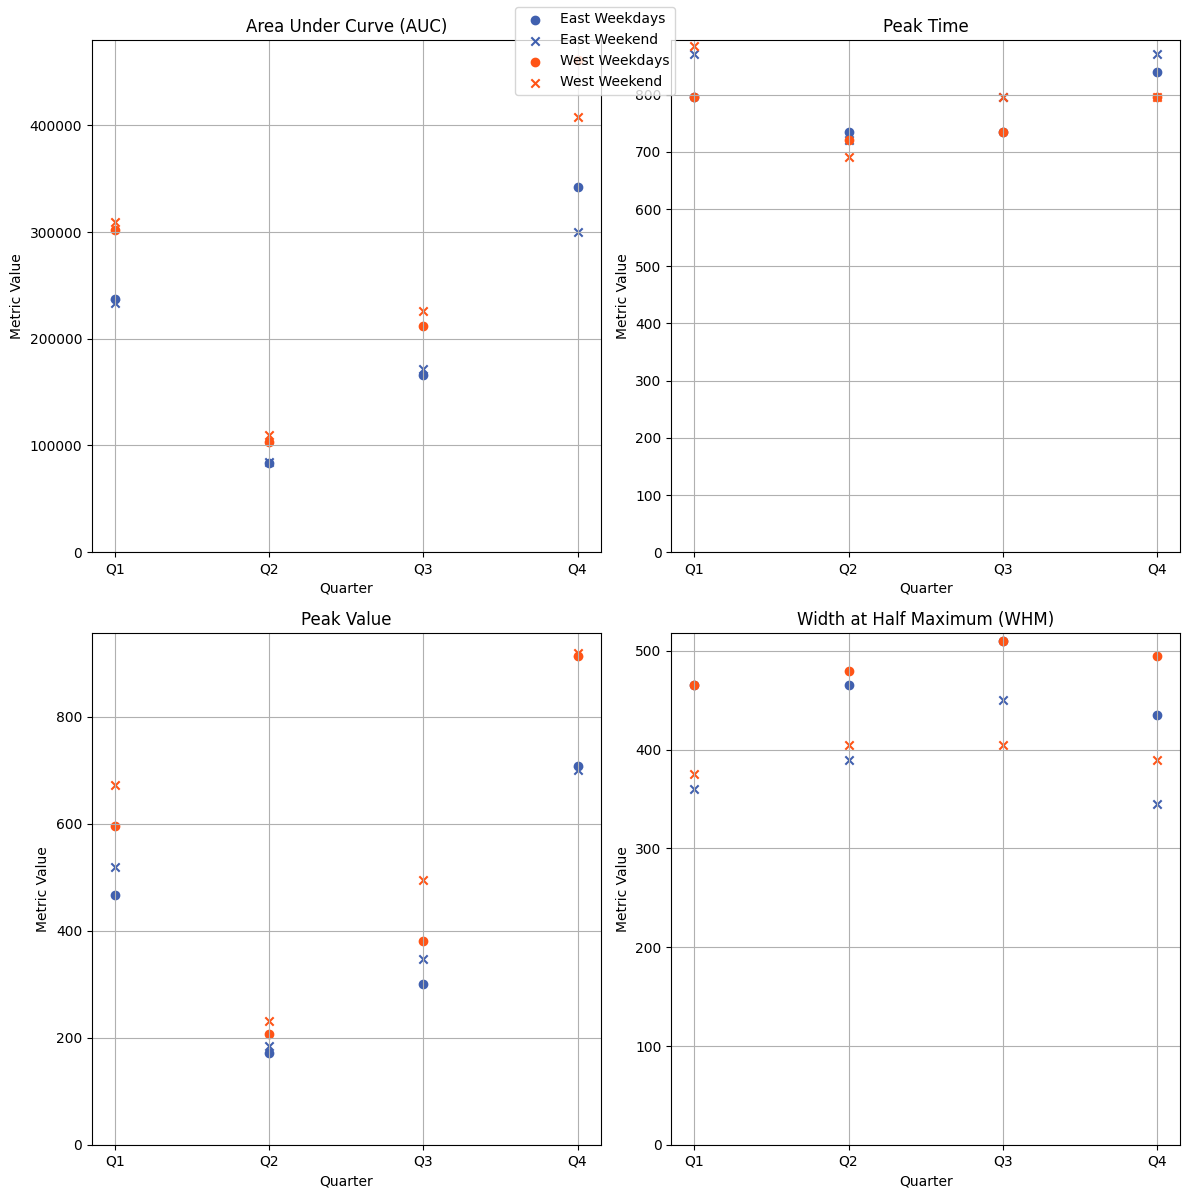

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# define your line scatters for east with color custom_palette[0] for blue
east_weekday_auc = ax[0, 0].scatter(
    east_weekday_metrics["quarter"],
    east_weekday_metrics["AUC"],
    label="East Weekdays",
    color=custom_palette[0],
)
east_weekend_auc = ax[0, 0].scatter(
    east_weekend_metrics["quarter"],
    east_weekend_metrics["AUC"],
    label="East Weekend",
    marker="x",
    color=custom_palette[0],
)

east_weekday_peak_time = ax[0, 1].scatter(
    east_weekday_metrics["quarter"],
    east_weekday_metrics["peak_time"],
    label="East Weekdays",
    color=custom_palette[0],
)
east_weekend_peak_time = ax[0, 1].scatter(
    east_weekend_metrics["quarter"],
    east_weekend_metrics["peak_time"],
    label="East Weekend",
    marker="x",
    color=custom_palette[0],
)

east_weekday_peak_value = ax[1, 0].scatter(
    east_weekday_metrics["quarter"],
    east_weekday_metrics["peak_value"],
    label="East Weekdays",
    color=custom_palette[0],
)
east_weekend_peak_value = ax[1, 0].scatter(
    east_weekend_metrics["quarter"],
    east_weekend_metrics["peak_value"],
    label="East Weekend",
    marker="x",
    color=custom_palette[0],
)

east_weekday_whm = ax[1, 1].scatter(
    east_weekday_metrics["quarter"],
    east_weekday_metrics["WHM"],
    label="East Weekdays",
    color=custom_palette[0],
)
east_weekend_whm = ax[1, 1].scatter(
    east_weekend_metrics["quarter"],
    east_weekend_metrics["WHM"],
    label="East Weekend",
    marker="x",
    color=custom_palette[0],
)

# define your line scatters for west with color custom_palette[1] for red
west_weekday_auc = ax[0, 0].scatter(
    west_weekday_metrics["quarter"],
    west_weekday_metrics["AUC"],
    label="West Weekdays",
    color=custom_palette[1],
)
west_weekend_auc = ax[0, 0].scatter(
    west_weekend_metrics["quarter"],
    west_weekend_metrics["AUC"],
    label="West Weekend",
    marker="x",
    color=custom_palette[1],
)

west_weekday_peak_time = ax[0, 1].scatter(
    west_weekday_metrics["quarter"],
    west_weekday_metrics["peak_time"],
    label="West Weekdays",
    color=custom_palette[1],
)
west_weekend_peak_time = ax[0, 1].scatter(
    west_weekend_metrics["quarter"],
    west_weekend_metrics["peak_time"],
    label="West Weekend",
    marker="x",
    color=custom_palette[1],
)

west_weekday_peak_value = ax[1, 0].scatter(
    west_weekday_metrics["quarter"],
    west_weekday_metrics["peak_value"],
    label="West Weekdays",
    color=custom_palette[1],
)
west_weekend_peak_value = ax[1, 0].scatter(
    west_weekend_metrics["quarter"],
    west_weekend_metrics["peak_value"],
    label="West Weekend",
    marker="x",
    color=custom_palette[1],
)

west_weekday_whm = ax[1, 1].scatter(
    west_weekday_metrics["quarter"],
    west_weekday_metrics["WHM"],
    label="West Weekdays",
    color=custom_palette[1],
)
west_weekend_whm = ax[1, 1].scatter(
    west_weekend_metrics["quarter"],
    west_weekend_metrics["WHM"],
    label="West Weekend",
    marker="x",
    color=custom_palette[1],
)

# the rest of the code remains unchanged

ax[0, 0].set_title("Area Under Curve (AUC)")
ax[0, 1].set_title("Peak Time")
ax[1, 0].set_title("Peak Value")
ax[1, 1].set_title("Width at Half Maximum (WHM)")

for i in range(2):
    for j in range(2):
        ax[i, j].set_xlabel("Quarter")
        ax[i, j].set_ylabel("Metric Value")

for i in range(2):
    for j in range(2):
        ax[i, j].set_ylim(bottom=0)
        ax[i, j].grid(True)

# add a legend
fig.legend(
    [east_weekday_auc, east_weekend_auc, west_weekday_auc, west_weekend_auc],
    ["East Weekdays", "East Weekend", "West Weekdays", "West Weekend"],
    loc="upper center",
)

plt.tight_layout()
plt.show()

Rather looking at the Peak time and Peak time in isolation we should plot them with time of day on the x-axis and flow on the y-axis as above. This plot shows more clearly how peak values change relative to peak time throughout the year and for weekend/weekday. It is evident that the peak time is (for most of the year) 30-90 mins later at the weekend than during the weekdays. The exception is during Q2 where it is 15 mins earlier at the weekend than during the weekdays. It might be useful to investigate this pattern at greater granularity using months rather than quarters. 

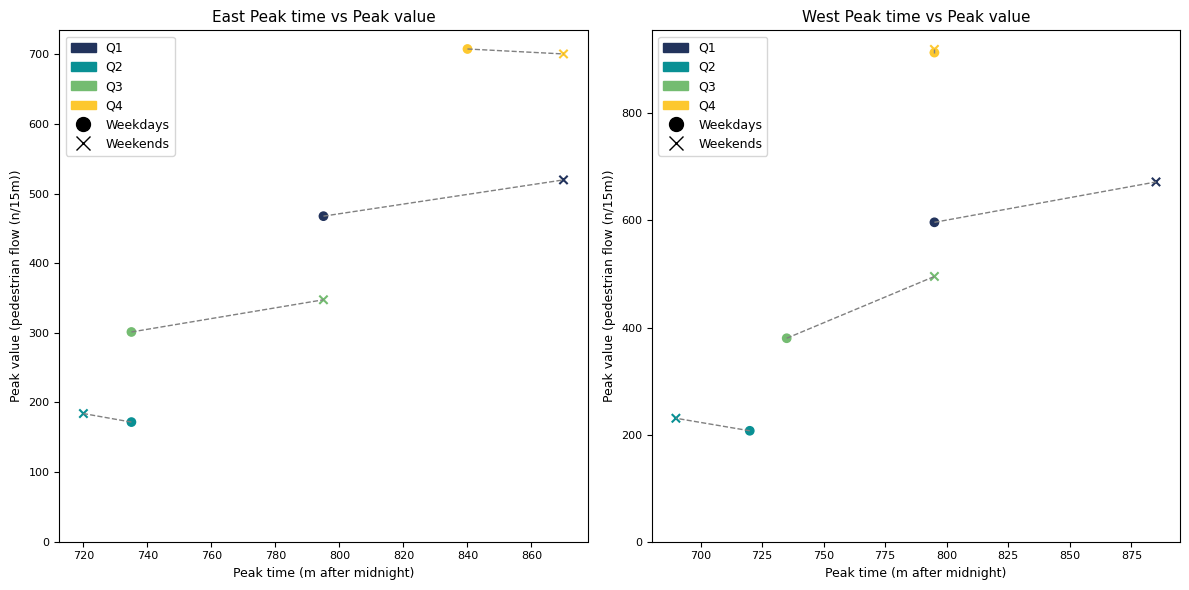

In [21]:
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

cmap = matplotlib.colors.ListedColormap([custom_colormap(i / 11) for i in range(12)])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for direction, metrics_weekday, metrics_weekend, index in zip(
    ["East", "West"],
    [east_weekday_metrics, west_weekday_metrics],
    [east_weekend_metrics, west_weekend_metrics],
    [0, 1],
):
    for i in range(4):  # Assume there are 12 months in your data
        # Plot a line between the weekday and weekend points for each month
        ax[index].plot(
            [metrics_weekday["peak_time"][i], metrics_weekend["peak_time"][i]],
            [metrics_weekday["peak_value"][i], metrics_weekend["peak_value"][i]],
            color="gray",
            linewidth=1,
            linestyle="--",
        )

    ax[index].scatter(
        metrics_weekday["peak_time"],
        metrics_weekday["peak_value"],
        c=metrics_weekday.index,
        cmap=cmap,
        marker="o",
    )
    ax[index].scatter(
        metrics_weekend["peak_time"],
        metrics_weekend["peak_value"],
        c=metrics_weekend.index,
        cmap=cmap,
        marker="x",
    )
    ax[index].set_ylim(0)
    ax[index].set_xlabel("Peak time (m after midnight)", fontsize=9)
    ax[index].set_ylabel("Peak value (pedestrian flow (n/15m))", fontsize=9)
    ax[index].tick_params(labelsize=8)

    # create a legend for quarters
    quarter_handles = [
        mpatches.Patch(color=cmap(i / 3), label=f"Q{i+1}") for i in range(4)
    ]

    # create a legend for weekdays and weekends
    weekday_line = mlines.Line2D(
        [],
        [],
        color="black",
        marker="o",
        linestyle="None",
        markersize=10,
        label="Weekdays",
    )
    weekend_line = mlines.Line2D(
        [],
        [],
        color="black",
        marker="x",
        linestyle="None",
        markersize=10,
        label="Weekends",
    )

    ax[index].legend(
        handles=quarter_handles + [weekday_line, weekend_line],
        loc="upper left",
        fontsize=9,
    )

    ax[index].set_title(f"{direction} Peak time vs Peak value", fontsize=11)

plt.tight_layout()
plt.show()

(2.3.3.2)=
#### 2.3.3.2 Pattern properties of monthly mean trendlines

In [22]:
from scipy import integrate

# initialize list to store metrics DataFrames for weekends and weekdays
east_weekend_metrics = []
east_weekday_metrics = []
west_weekend_metrics = []
west_weekday_metrics = []

month_names = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

# For East
east_month_interval_mean_df = (
    weekend_east_df.groupby(["month", "minutes_since_midnight"])["value"]
    .mean()
    .reset_index()
)

# compute metrics for each month and add to DataFrame for weekends
for month in range(1, 13):
    month_data = east_month_interval_mean_df[
        east_month_interval_mean_df["month"] == month
    ]
    auc = integrate.trapz(month_data["value"], dx=15)  # dx time interval is 15 minutes
    peak_time = month_data["minutes_since_midnight"][month_data["value"].idxmax()]
    peak_value = month_data["value"].max()
    whm_time_range = month_data["minutes_since_midnight"][
        (month_data["value"] >= peak_value / 2)
    ]
    whm = (
        whm_time_range.max() - whm_time_range.min()
    )  # calculate WHM as (minutes_since_midnight is a numeric value)
    east_weekend_metrics.append(
        pd.DataFrame(
            {
                "month": [f"{month_names[month-1]}"],
                "AUC": [auc],
                "peak_time": [peak_time],
                "peak_value": [peak_value],
                "WHM": [whm],
            }
        )
    )

# similarly, for weekdays
east_month_interval_mean_df = (
    weekday_east_df.groupby(["month", "minutes_since_midnight"])["value"]
    .mean()
    .reset_index()
)

# compute metrics for each month and add to DataFrame for weekdays
for month in range(1, 13):
    month_data = east_month_interval_mean_df[
        east_month_interval_mean_df["month"] == month
    ]
    auc = integrate.trapz(month_data["value"], dx=15)  # dx time interval is 15 minutes
    peak_time = month_data["minutes_since_midnight"][month_data["value"].idxmax()]
    peak_value = month_data["value"].max()
    whm_time_range = month_data["minutes_since_midnight"][
        (month_data["value"] >= peak_value / 2)
    ]
    whm = (
        whm_time_range.max() - whm_time_range.min()
    )  # calculate WHM as (minutes_since_midnight is a numeric value)
    east_weekday_metrics.append(
        pd.DataFrame(
            {
                "month": [f"{month_names[month-1]}"],
                "AUC": [auc],
                "peak_time": [peak_time],
                "peak_value": [peak_value],
                "WHM": [whm],
            }
        )
    )

# For West
west_month_interval_mean_df = (
    weekend_west_df.groupby(["month", "minutes_since_midnight"])["value"]
    .mean()
    .reset_index()
)

# compute metrics for each month and add to DataFrame for weekends
for month in range(1, 13):
    month_data = west_month_interval_mean_df[
        west_month_interval_mean_df["month"] == month
    ]
    auc = integrate.trapz(month_data["value"], dx=15)  # dx time interval is 15 minutes
    peak_time = month_data["minutes_since_midnight"][month_data["value"].idxmax()]
    peak_value = month_data["value"].max()
    whm_time_range = month_data["minutes_since_midnight"][
        (month_data["value"] >= peak_value / 2)
    ]
    whm = (
        whm_time_range.max() - whm_time_range.min()
    )  # calculate WHM as (minutes_since_midnight is a numeric value)
    west_weekend_metrics.append(
        pd.DataFrame(
            {
                "month": [f"{month_names[month-1]}"],
                "AUC": [auc],
                "peak_time": [peak_time],
                "peak_value": [peak_value],
                "WHM": [whm],
            }
        )
    )

# similarly, for weekdays
west_month_interval_mean_df = (
    weekday_west_df.groupby(["month", "minutes_since_midnight"])["value"]
    .mean()
    .reset_index()
)

# compute metrics for each month and add to DataFrame for weekdays
for month in range(1, 13):
    month_data = west_month_interval_mean_df[
        west_month_interval_mean_df["month"] == month
    ]
    auc = integrate.trapz(month_data["value"], dx=15)  # dx time interval is 15 minutes
    peak_time = month_data["minutes_since_midnight"][month_data["value"].idxmax()]
    peak_value = month_data["value"].max()
    whm_time_range = month_data["minutes_since_midnight"][
        (month_data["value"] >= peak_value / 2)
    ]
    whm = (
        whm_time_range.max() - whm_time_range.min()
    )  # calculate WHM as (minutes_since_midnight is a numeric value)
    west_weekday_metrics.append(
        pd.DataFrame(
            {
                "month": [f"{month_names[month-1]}"],
                "AUC": [auc],
                "peak_time": [peak_time],
                "peak_value": [peak_value],
                "WHM": [whm],
            }
        )
    )

# concatenate the list of dataframes to a single dataframe
east_weekend_metrics = pd.concat(east_weekend_metrics, ignore_index=True)
east_weekday_metrics = pd.concat(east_weekday_metrics, ignore_index=True)

west_weekend_metrics = pd.concat(west_weekend_metrics, ignore_index=True)
west_weekday_metrics = pd.concat(west_weekday_metrics, ignore_index=True)

# Compute the deltas
east_weekend_metrics["delta_peak_time"] = (
    east_weekend_metrics["peak_time"] - east_weekday_metrics["peak_time"]
)
east_weekend_metrics["delta_peak_value"] = (
    east_weekend_metrics["peak_value"] - east_weekday_metrics["peak_value"]
)

east_weekday_metrics["delta_peak_time"] = (
    east_weekday_metrics["peak_time"] - east_weekend_metrics["peak_time"]
)
east_weekday_metrics["delta_peak_value"] = (
    east_weekday_metrics["peak_value"] - east_weekend_metrics["peak_value"]
)

west_weekend_metrics["delta_peak_time"] = (
    west_weekend_metrics["peak_time"] - west_weekday_metrics["peak_time"]
)
west_weekend_metrics["delta_peak_value"] = (
    west_weekend_metrics["peak_value"] - west_weekday_metrics["peak_value"]
)

west_weekday_metrics["delta_peak_time"] = (
    west_weekday_metrics["peak_time"] - west_weekend_metrics["peak_time"]
)
west_weekday_metrics["delta_peak_value"] = (
    west_weekday_metrics["peak_value"] - west_weekend_metrics["peak_value"]
)

Unsurprisingly the pattern becomes slightly more chaotic as we go more granular. However, the U shape of AUC and Peak value still largely holds and there is still a consistent seperation between weekends and weekdays for WHM. Let's have a look at peak time and peak value on the same plot again. 

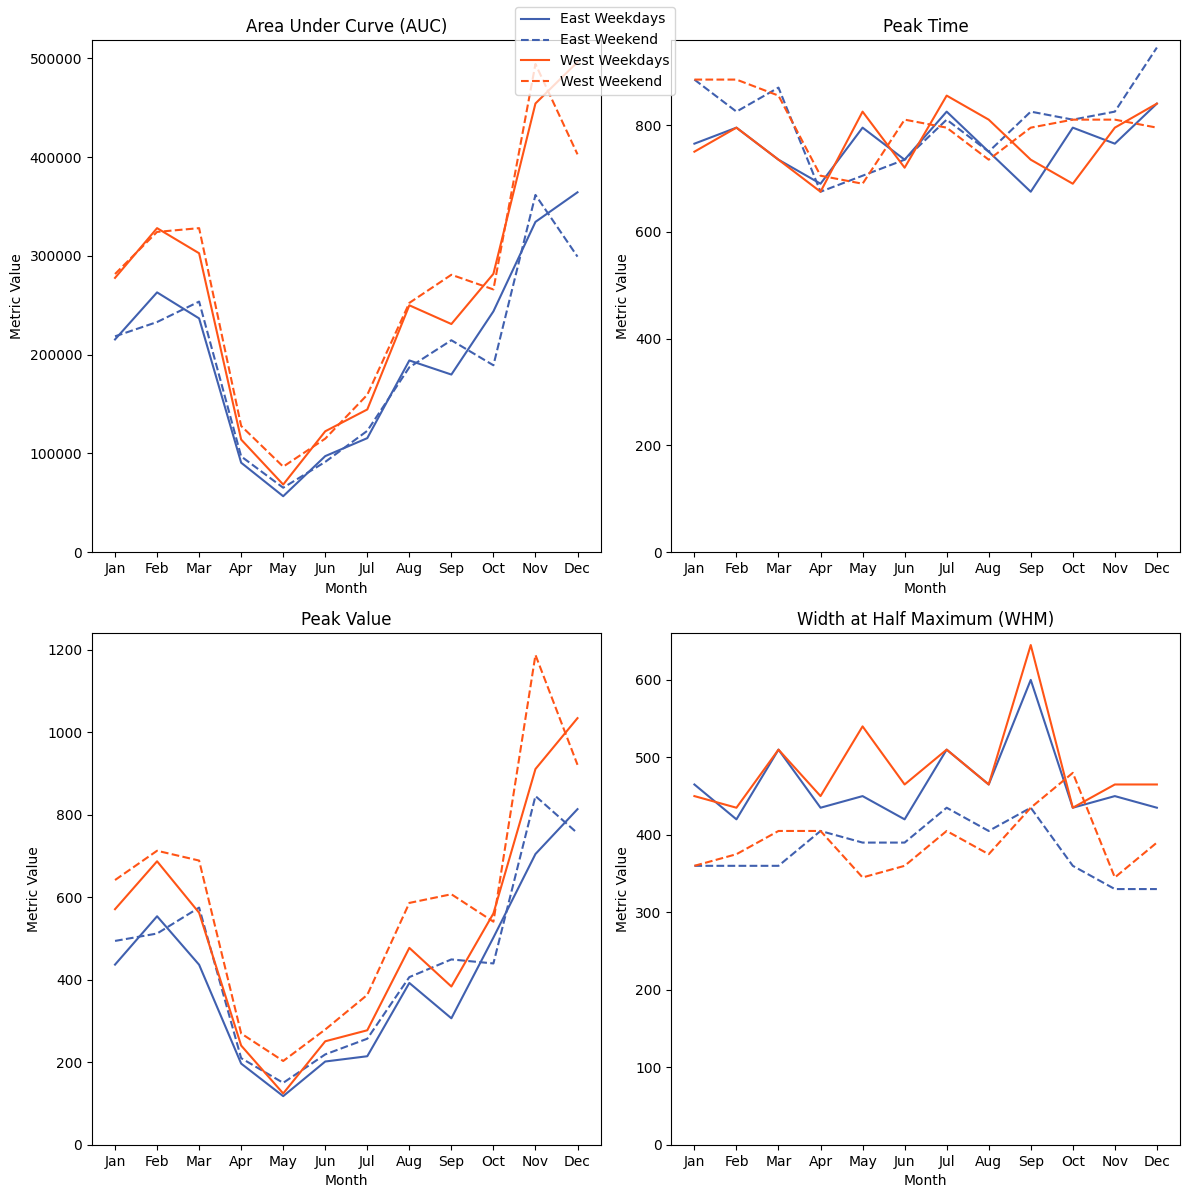

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# define your line plots for east with color custom_palette[0] for blue
(east_weekday_auc,) = ax[0, 0].plot(
    east_weekday_metrics["month"],
    east_weekday_metrics["AUC"],
    label="East Weekdays",
    color=custom_palette[0],
)
(east_weekend_auc,) = ax[0, 0].plot(
    east_weekend_metrics["month"],
    east_weekend_metrics["AUC"],
    label="East Weekend",
    linestyle="--",
    color=custom_palette[0],
)

(east_weekday_peak_time,) = ax[0, 1].plot(
    east_weekday_metrics["month"],
    east_weekday_metrics["peak_time"],
    label="East Weekdays",
    color=custom_palette[0],
)
(east_weekend_peak_time,) = ax[0, 1].plot(
    east_weekend_metrics["month"],
    east_weekend_metrics["peak_time"],
    label="East Weekend",
    linestyle="--",
    color=custom_palette[0],
)

(east_weekday_peak_value,) = ax[1, 0].plot(
    east_weekday_metrics["month"],
    east_weekday_metrics["peak_value"],
    label="East Weekdays",
    color=custom_palette[0],
)
(east_weekend_peak_value,) = ax[1, 0].plot(
    east_weekend_metrics["month"],
    east_weekend_metrics["peak_value"],
    label="East Weekend",
    linestyle="--",
    color=custom_palette[0],
)

(east_weekday_whm,) = ax[1, 1].plot(
    east_weekday_metrics["month"],
    east_weekday_metrics["WHM"],
    label="East Weekdays",
    color=custom_palette[0],
)
(east_weekend_whm,) = ax[1, 1].plot(
    east_weekend_metrics["month"],
    east_weekend_metrics["WHM"],
    label="East Weekend",
    linestyle="--",
    color=custom_palette[0],
)

# define your line plots for west with color custom_palette[1] for red
(west_weekday_auc,) = ax[0, 0].plot(
    west_weekday_metrics["month"],
    west_weekday_metrics["AUC"],
    label="West Weekdays",
    color=custom_palette[1],
)
(west_weekend_auc,) = ax[0, 0].plot(
    west_weekend_metrics["month"],
    west_weekend_metrics["AUC"],
    label="West Weekend",
    linestyle="--",
    color=custom_palette[1],
)

(west_weekday_peak_time,) = ax[0, 1].plot(
    west_weekday_metrics["month"],
    west_weekday_metrics["peak_time"],
    label="West Weekdays",
    color=custom_palette[1],
)
(west_weekend_peak_time,) = ax[0, 1].plot(
    west_weekend_metrics["month"],
    west_weekend_metrics["peak_time"],
    label="West Weekend",
    linestyle="--",
    color=custom_palette[1],
)

(west_weekday_peak_value,) = ax[1, 0].plot(
    west_weekday_metrics["month"],
    west_weekday_metrics["peak_value"],
    label="West Weekdays",
    color=custom_palette[1],
)
(west_weekend_peak_value,) = ax[1, 0].plot(
    west_weekend_metrics["month"],
    west_weekend_metrics["peak_value"],
    label="West Weekend",
    linestyle="--",
    color=custom_palette[1],
)

(west_weekday_whm,) = ax[1, 1].plot(
    west_weekday_metrics["month"],
    west_weekday_metrics["WHM"],
    label="West Weekdays",
    color=custom_palette[1],
)
(west_weekend_whm,) = ax[1, 1].plot(
    west_weekend_metrics["month"],
    west_weekend_metrics["WHM"],
    label="West Weekend",
    linestyle="--",
    color=custom_palette[1],
)

# the rest of the code remains unchanged

ax[0, 0].set_title("Area Under Curve (AUC)")
ax[0, 1].set_title("Peak Time")
ax[1, 0].set_title("Peak Value")
ax[1, 1].set_title("Width at Half Maximum (WHM)")

for i in range(2):
    for j in range(2):
        ax[i, j].set_xlabel("Month")
        ax[i, j].set_ylabel("Metric Value")

for i in range(2):
    for j in range(2):
        ax[i, j].set_ylim(bottom=0)

# add a legend
fig.legend(
    [east_weekday_auc, east_weekend_auc, west_weekday_auc, west_weekend_auc],
    ["East Weekdays", "East Weekend", "West Weekdays", "West Weekend"],
    loc="upper center",
)

plt.tight_layout()
plt.show()

Again the pattern appears more chaotic but the general trend still holds. To make this easier to interpret lets plot the deltas between weekend and weekday rather than the actual values. 

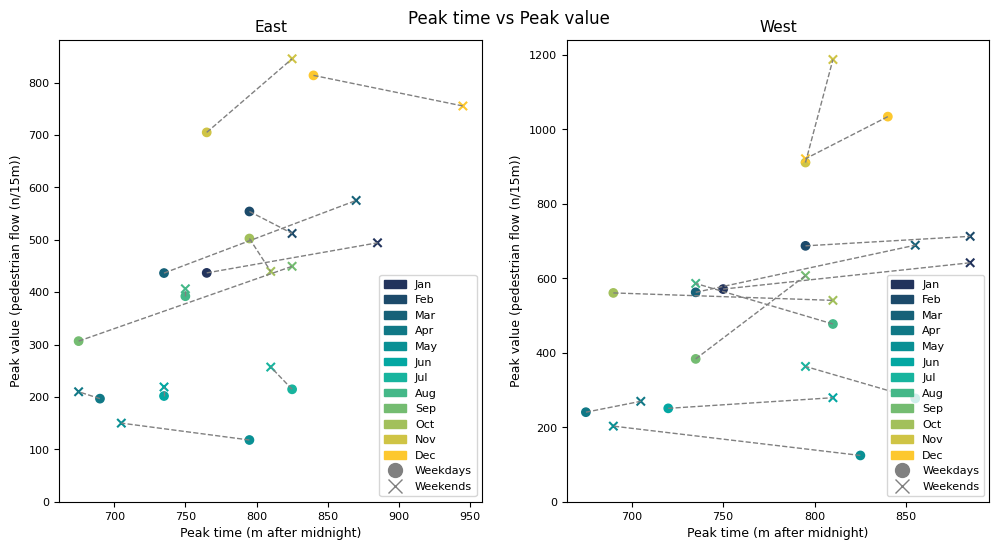

In [24]:
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

cmap = matplotlib.colors.ListedColormap([custom_colormap(i / 11) for i in range(12)])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# For East
for i in range(12):  # for the 12 months
    # plot a line between the weekday and weekend points for each month
    ax[0].plot(
        [east_weekday_metrics["peak_time"][i], east_weekend_metrics["peak_time"][i]],
        [east_weekday_metrics["peak_value"][i], east_weekend_metrics["peak_value"][i]],
        color="gray",
        linewidth=1,
        linestyle="--",
    )

# plot the data
ax[0].scatter(
    east_weekday_metrics["peak_time"],
    east_weekday_metrics["peak_value"],
    c=east_weekday_metrics.index,
    cmap=cmap,
    marker="o",
)
ax[0].scatter(
    east_weekend_metrics["peak_time"],
    east_weekend_metrics["peak_value"],
    c=east_weekend_metrics.index,
    cmap=cmap,
    marker="x",
)
ax[0].set_ylim(0)
ax[0].set_xlabel("Peak time (m after midnight)", fontsize=9)
ax[0].set_ylabel("Peak value (pedestrian flow (n/15m))", fontsize=9)
ax[0].tick_params(labelsize=8)
ax[0].set_title("East", fontsize=11)

# For West
for i in range(12):  # for the 12 months
    # plot a line between the weekday and weekend points for each month
    ax[1].plot(
        [west_weekday_metrics["peak_time"][i], west_weekend_metrics["peak_time"][i]],
        [west_weekday_metrics["peak_value"][i], west_weekend_metrics["peak_value"][i]],
        color="gray",
        linewidth=1,
        linestyle="--",
    )

# plot the data
ax[1].scatter(
    west_weekday_metrics["peak_time"],
    west_weekday_metrics["peak_value"],
    c=west_weekday_metrics.index,
    cmap=cmap,
    marker="o",
)
ax[1].scatter(
    west_weekend_metrics["peak_time"],
    west_weekend_metrics["peak_value"],
    c=west_weekend_metrics.index,
    cmap=cmap,
    marker="x",
)
ax[1].set_ylim(0)
ax[1].set_xlabel("Peak time (m after midnight)", fontsize=9)
ax[1].set_ylabel("Peak value (pedestrian flow (n/15m))", fontsize=9)
ax[1].tick_params(labelsize=8)
ax[1].set_title("West", fontsize=11)

# create a legend for months
month_handles = [
    mpatches.Patch(color=cmap(i / 11), label=f"{month_names[i]}") for i in range(12)
]

# create weekend/weekdays markers for the legend
weekday_marker = mlines.Line2D(
    [], [], color="gray", marker="o", linestyle="None", markersize=10, label="Weekdays"
)
weekend_marker = mlines.Line2D(
    [], [], color="gray", marker="x", linestyle="None", markersize=10, label="Weekends"
)

# add the legend for both the months and the weekday/weekend markers
ax[0].legend(
    handles=month_handles + [weekday_marker, weekend_marker],
    loc="lower right",
    fontsize=8,
)
ax[1].legend(
    handles=month_handles + [weekday_marker, weekend_marker],
    loc="lower right",
    fontsize=8,
)
plt.suptitle("Peak time vs Peak value", y=0.93)
plt.show()

If we plot these as the deltas between weekdays mean and weekends mean, we can attempt to group them according to quadrant location. 

It looks like there are two patterns that hold for both sensors. They are:
* February, October, December in the $(-x, y)$ quadrant.
* January, March, August, November in the $(-x, -y)$ quadrant.

This pattern possibly emerges form the combined influence of the Premier League season from August to May and the Newcastle and Northumbria Universities term dates.

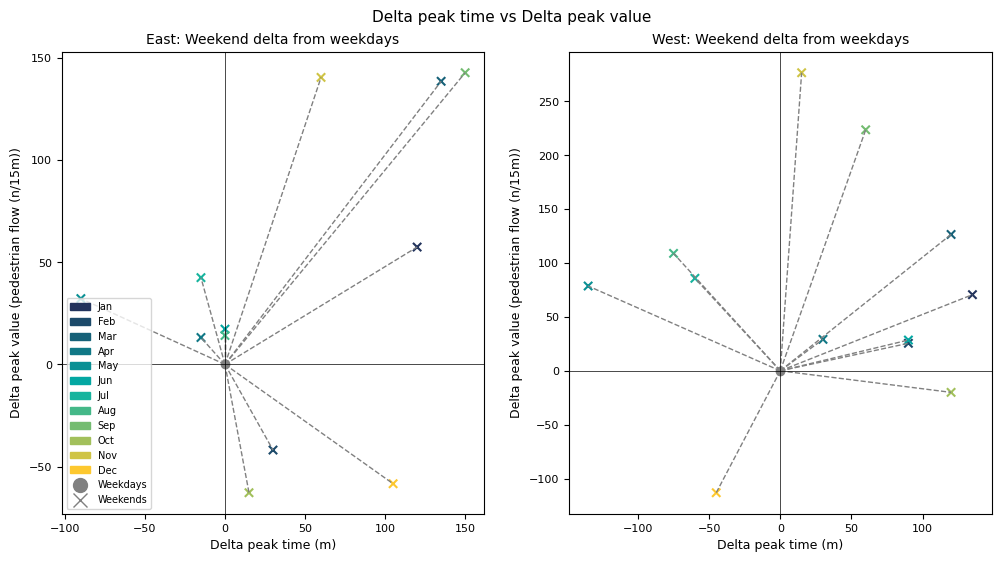

In [25]:
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

cmap = matplotlib.colors.ListedColormap([custom_colormap(i / 11) for i in range(12)])

fig, ax = plt.subplots(
    1, 2, figsize=(12, 6)
)  # Change to 12,12 to accommodate the additional subplots

# Create a legend for months
month_handles = [
    mpatches.Patch(color=cmap(i / 11), label=f"{month_names[i]}") for i in range(12)
]

# Create a legend for weekends
weekday_line = mlines.Line2D(
    [], [], color="gray", marker="o", linestyle="None", markersize=10, label="Weekdays"
)
weekend_line = mlines.Line2D(
    [], [], color="gray", marker="x", linestyle="None", markersize=10, label="Weekends"
)

# East: Plot the deltas and the lines from the origin for weekends
for i in range(12):
    ax[0].plot(
        [0, east_weekend_metrics["delta_peak_time"][i]],
        [0, east_weekend_metrics["delta_peak_value"][i]],
        color="gray",
        linewidth=1,
        linestyle="--",
    )

ax[0].scatter(
    east_weekend_metrics["delta_peak_time"],
    east_weekend_metrics["delta_peak_value"],
    c=east_weekend_metrics.index,
    cmap=cmap,
    marker="x",
)
ax[0].scatter(0, 0, c="gray", marker="o")
ax[0].axhline(0, color="black", linewidth=0.5)
ax[0].axvline(0, color="black", linewidth=0.5)
ax[0].set_xlabel("Delta peak time (m)", fontsize=9)
ax[0].set_ylabel("Delta peak value (pedestrian flow (n/15m))", fontsize=9)
ax[0].tick_params(labelsize=8)
ax[0].set_title("East: Weekend delta from weekdays", fontsize=10)

ax[0].legend(
    handles=month_handles + [weekday_line, weekend_line], loc="lower left", fontsize=7
)

# West: Plot the deltas and the lines from the origin for weekends
for i in range(12):
    ax[1].plot(
        [0, west_weekend_metrics["delta_peak_time"][i]],
        [0, west_weekend_metrics["delta_peak_value"][i]],
        color="gray",
        linewidth=1,
        linestyle="--",
    )

ax[1].scatter(
    west_weekend_metrics["delta_peak_time"],
    west_weekend_metrics["delta_peak_value"],
    c=west_weekend_metrics.index,
    cmap=cmap,
    marker="x",
)
ax[1].scatter(0, 0, c="gray", marker="o")
ax[1].axhline(0, color="black", linewidth=0.5)
ax[1].axvline(0, color="black", linewidth=0.5)
ax[1].set_xlabel("Delta peak time (m)", fontsize=9)
ax[1].set_ylabel("Delta peak value (pedestrian flow (n/15m))", fontsize=9)
ax[1].tick_params(labelsize=8)
ax[1].set_title("West: Weekend delta from weekdays", fontsize=10)

plt.suptitle("Delta peak time vs Delta peak value", fontsize=11, y=0.95)
plt.show()

Lets check if any of these values hold statistical significance.

WIP (I can't figure out how to do this bit just yet).

(2.3.4)=
### 2.3.4 Signal decomposition

The Fourier Transform is a mathematical technique used in signal processing and image analysis, among many other fields. Named after the French mathematician and physicist Jean-Baptiste Joseph Fourier, it is a way of breaking down a complex signal into a set of simple sine waves of different frequencies. This breakdown is useful because it allows us to analyse the signal in the frequency domain, which can reveal important features that are not readily apparent in the time domain {cite}`bloomfield2004fourier`.

The Fourier Transform for a function $f(t)$ is defined as:
$$
F(\omega) = \int_{-\infty}^{\infty} f(t)e^{-i\omega t} dt
$$

The Discrete Fourier Transform (DFT) is a version of the Fourier Transform that is suitable for sequences of numbers like a time-series. Like the Fourier Transform, it transforms a signal from the time domain into the frequency domain, but it does this for a finite set of data points rather than a continuous function. The DFT is implemented in practice using the Fast Fourier Transform (FFT) algorithm, which significantly reduces computational time {cite}`oppenheim1999discrete`.

The Discrete Fourier Transform (DFT) for a sequence of $N$ complex numbers $x_0, x_1, ..., x_{N-1}$ is:
$$
X_k = \sum_{n=0}^{N-1} x_n e^{-\frac{i 2 \pi}{N} kn}
$$

The Fourier Transform transform is particularly useful in time series analysis for a couple of reasons {cite}`bracewell1986fourier`:

1. **Identification of periodicity**: Fourier Transform can be used to identify cyclical patterns or seasonality by decomposing the time series into its frequency components. Peaks in the frequency domain represent the frequencies at which the data is oscillating.

2. **Filtering and noise reduction**: By transforming the time series data into the frequency domain, it's possible to identify and filter out high-frequency noise, making it easier to identify underlying patterns in the data.


However, one limitation of traditional Fourier methods is that they assume the data is stationary - i.e., its properties do not change over time. This is almost certainly not the case with our data and we can expect to see trends or changes in variance over time. As a result, variations of the Fourier Transform that can handle non-stationary data, such as the Short-Time Fourier Transform or Wavelet Transform, may be more appropriate in this case {cite}`jones1989resolution`. 
The Short-Time Fourier Transform (STFT) of a signal $x(t)$ with a chosen window function $w(t)$ is given by:

$$
STFT\{x(t)\}(\tau, \omega) = \int_{-\infty}^{\infty} x(t)w(t-\tau)e^{-i\omega t} dt
$$

The final caveat on for FFT's is that our data is incomplete (see section 2.4) with missing periods of significanlty different length (some gaps are several weeks). All the Fourier Transforms listed above require equispaced data. For now, we want to avoid any data imputation or interpolation as this might introduce artificial patterns. The Non-equispaced Fast Fourier Transform (NFFT) offers one solution to this problem and exists as a Python library called `pyNFFT`. However it is rather difficult to install on Windows operating systems. This is something that can be attempted later on in the research. 

The Lomb-Scargle Periodogram (LSP) is a Fourier method which is implemented in the `scipy` library and computes a Fourier-like power spectrum estimator. LSP involves fitting a model to the data at each candidate frequency and selecting the frequency that maximizes the likelihood, which makes it more flexible and suitable for data that doesn't align neatly with whole cycles of sine waves. One of the key assumptions made by the Periodogram is that the noise is Gaussian and evenly distributed {cite}`vanderplas2018understanding`.

We can see from the LSP that the most powerful signals arise at 12 and 24 hour period. This makes sense as we expect the daily routine would dominate. We would expect the most powerful signals to arise in 24 hours cycles i.e. people generally carry out the same patterns of activity at the same hours of each day. The 12 hour frequency is slightly less easy to explain. It most likely arises from standards daily routines like going to work and returning home.

In [26]:
sorted_east_df = east_agg_df.sort_values("dt").reset_index()
sorted_west_df = west_agg_df.sort_values("dt").reset_index()

In [27]:
# import numpy as np
# from scipy.signal import lombscargle
# import matplotlib.pyplot as plt
# import pandas as pd

# times = np.array((sorted_east_df["dt"] - sorted_east_df["dt"][0]).dt.total_seconds())
# observations = np.array(sorted_east_df["value"], dtype=float)

# # normalize the input time-series data
# mean = np.mean(observations)
# observations -= mean
# variance = np.var(observations)
# observations /= np.sqrt(variance)

# # define periods of interest (in seconds)
# T_hour = 60 * 60
# T_day = 24 * T_hour
# T_week = 7 * T_day
# T_month = 30 * T_day  # approximate
# T_quarter = 3 * T_month
# T_year = 365 * T_day

# # convert periods to angular frequencies and create frequency array
# freq_hour = 2 * np.pi / T_hour
# freq_day = 2 * np.pi / T_day
# freq_week = 2 * np.pi / T_week
# freq_month = 2 * np.pi / T_month
# freq_quarter = 2 * np.pi / T_quarter
# freq_year = 2 * np.pi / T_year

# frequencies = np.linspace(freq_year, freq_hour, num=50000)

# # compute the Lomb-Scargle periodogram of the normalized data
# periodogram = lombscargle(times, observations, frequencies)

# # convert angular frequencies to regular frequencies for plotting
# frequencies = frequencies / (2.0 * np.pi)

# # plot the periodogram with a log-scaled x-axis
# plt.figure(figsize=(10, 5))
# plt.plot(frequencies, periodogram)
# plt.xscale("log")
# plt.gca().set_xticks(
#     [
#         1 / T_year,
#         1 / T_quarter,
#         1 / T_month,
#         1 / T_week,
#         1 / (T_day),
#         1 / (12 * T_hour),
#         1 / (T_hour),
#     ]
# )
# plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())
# plt.gca().set_xticklabels(
#     ["1/year", "1/quarter", "1/month", "1/week", "1/day", "1/12hour", "1/hour"]
# )
# plt.xlabel("Frequency (1/T)")
# plt.ylabel("Lomb Scargle Power")
# # plt.title("East - Lomb-Scargle Periodogram")
# plt.grid(True)
# plt.show()

In [28]:
# times = np.array((sorted_west_df["dt"] - sorted_west_df["dt"][0]).dt.total_seconds())
# observations = np.array(sorted_west_df["value"], dtype=float)

# # normalize the input time-series data
# mean = np.mean(observations)
# observations -= mean
# variance = np.var(observations)
# observations /= np.sqrt(variance)

# # define periods of interest (in seconds)
# T_hour = 60 * 60
# T_day = 24 * T_hour
# T_week = 7 * T_day
# T_month = 30 * T_day  # approximate
# T_quarter = 3 * T_month
# T_year = 365 * T_day

# # convert periods to angular frequencies and create frequency array
# freq_hour = 2 * np.pi / T_hour
# freq_day = 2 * np.pi / T_day
# freq_week = 2 * np.pi / T_week
# freq_month = 2 * np.pi / T_month
# freq_quarter = 2 * np.pi / T_quarter
# freq_year = 2 * np.pi / T_year

# frequencies = np.linspace(freq_year, freq_hour, num=50000)

# # compute the Lomb-Scargle periodogram of the normalized data
# periodogram = lombscargle(times, observations, frequencies)

# # convert angular frequencies to regular frequencies for plotting
# frequencies = frequencies / (2.0 * np.pi)

# # plot the periodogram with a log-scaled x-axis
# plt.figure(figsize=(10, 5))
# plt.plot(frequencies, periodogram, color=custom_palette[1])
# plt.xscale("log")
# plt.gca().set_xticks(
#     [
#         1 / T_year,
#         1 / T_quarter,
#         1 / T_month,
#         1 / T_week,
#         1 / (T_day),
#         1 / (12 * T_hour),
#         1 / (T_hour),
#     ]
# )
# plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())
# plt.gca().set_xticklabels(
#     ["1/year", "1/quarter", "1/month", "1/week", "1/day", "1/12hour", "1/hour"]
# )
# plt.xlabel("Frequency (1/T)")
# plt.ylabel("Lomb Scargle Power")
# # plt.title("East - Lomb-Scargle Periodogram")
# plt.grid(True)
# plt.show()

If we set the frequency range to 1/year and 1/week we can see more clearly the respective power of the lower frequencies. The next most powerful frequencies arise over quarterly and yearly periods. Again, we expect a reasonably strong annual signal as this means people carry out similar patterns of activity at similar points each year. Quarters are more tricky to explain, a possible reason might include the school/university holiday schedules which generally follow a quarterly cycle. 

In [29]:
# # zoom in on year to week frequency range

# frequencies = np.linspace(freq_year, freq_week, num=10000)

# # compute the Lomb-Scargle periodogram of the normalized data
# periodogram = lombscargle(times, observations, frequencies)

# # convert angular frequencies to regular frequencies for plotting
# frequencies = frequencies / (2.0 * np.pi)

# # plot the periodogram with a log-scaled x-axis
# plt.figure(figsize=(10, 5))
# plt.plot(frequencies, periodogram)
# plt.xscale("log")
# plt.gca().set_xticks([1 / T_year, 1 / T_quarter, 1 / T_month, 1 / T_week])
# plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())
# plt.gca().set_xticklabels(["1/year", "1/quarter", "1/month", "1/week"])
# plt.xlabel("Frequency (1/T)")
# plt.ylabel("Lomb Scargle Power")
# plt.title("Lomb-Scargle Periodogram")
# plt.grid(True)
# plt.show()

### 2.3.5 Clustering

#### 2.3.5.1 Clustering method

As we want to investigate the structure of the data we will use unsupervised learning techniques. Specifically clustering techniques like k-means, x-means and DBScan. These methods will hopefully reveal some underlying patterns in the data to help us achieve the objectives we set out in section 1.

#### 2.3.5.2 Creating a limited test dataset

In the first instance of clustering we will take one week of data that is complete i.e. a record exists for every 15 minute interval during that week. To calculate the number of records expected in a full week we use the following:

        4 (number of 15 minute periods in an hour) x 24 (hours in the day) x 7 (days in the week).

We are also going to aggregate and resample the data using our helper function `aggregate_and_preprocess_daily_data` which will again group on datetime and aggregate on sum to remove the trajectories information. It will then resample the data on day, and scale the data using the `sklearn.preprocessing.StandardScaler`.

### 2.3.5.3 Clustering the data

For our first clustering model we will use `sklearn.cluster.KMeans`. The steps for creating this model are:
1. Prepare the data.
    * Aggregate the pedestrian flow for both trajectories yielding sum.
    * Resample the data on each day yielding mean and std.
    * Scale the data using `sklearn.preprocessing.StandardScalar` (z = x - u / s)
2. Model the data
    * Use k=4 as an initial cluster value (representing seasonal periodicity)
    * Plot the results
3. Analyse the results
    * Test for different possible values of k
    * Calculate test metrics and compare
We will first need to rescale our dataset to improve model convergence. For this we will use the `sklearn.preprocessing.StandardScaler` which is calculated using z = (x - u) / s and returns a `numpy` array. 

Now we can cluster the data using the K-Means algorithm. This produces labels and centroids for the clusters. 

In [30]:
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)
from eda_helper import preprocess_data
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

In [31]:
dictionary = preprocess_data(
    west_df,
    completeness_threshold=1,
    frequency="D",
    additional_features=["day_in_week", "date"],
    consecutive_days=False,
    resample=True,
)

Removing incomplete days...
Initial number of records: 40099
Number of records in days @ 100% completeness: 16992
Proportion of records removed: 57.62%


In [32]:
timeseries, index, columns = (
    dictionary["data"],
    dictionary["index"],
    dictionary["columns"],
)
timeseries.shape, index.shape, columns.shape, columns
df = pd.DataFrame(timeseries, index=index, columns=columns)

In [33]:
df

,mean,std
dt,,
2021-12-03,434.489583,428.909903
2021-12-04,NaN,NaN
2021-12-05,NaN,NaN
2021-12-06,NaN,NaN
2021-12-07,265.531250,270.039917
...,...,...
2023-03-27,NaN,NaN
2023-03-28,194.239583,174.392041
2023-03-29,237.812500,224.457489


In [34]:
split_df = df.index.astype(str).str.split(" ", expand=True)
split_df = pd.DataFrame(split_df.tolist(), columns=["date", "time"], index=df.index)
df["date"] = split_df["date"]
df["time"] = split_df["time"]

ValueError: Shape of passed values is (484, 1), indices imply (484, 2)

Add sum of all the values for each day before clustering

Removing incomplete days...
Initial number of records: 40099
Number of records in days @ 100% completeness: 16992
Proportion of records removed: 57.62%
Maximum consecutive days: 9
Starting from day number 336 in 2022
Removing incomplete days...
Initial number of records: 40099
Number of records in days @ 100% completeness: 16992
Proportion of records removed: 57.62%


ValueError: Cannot set a DataFrame with multiple columns to the single column mean

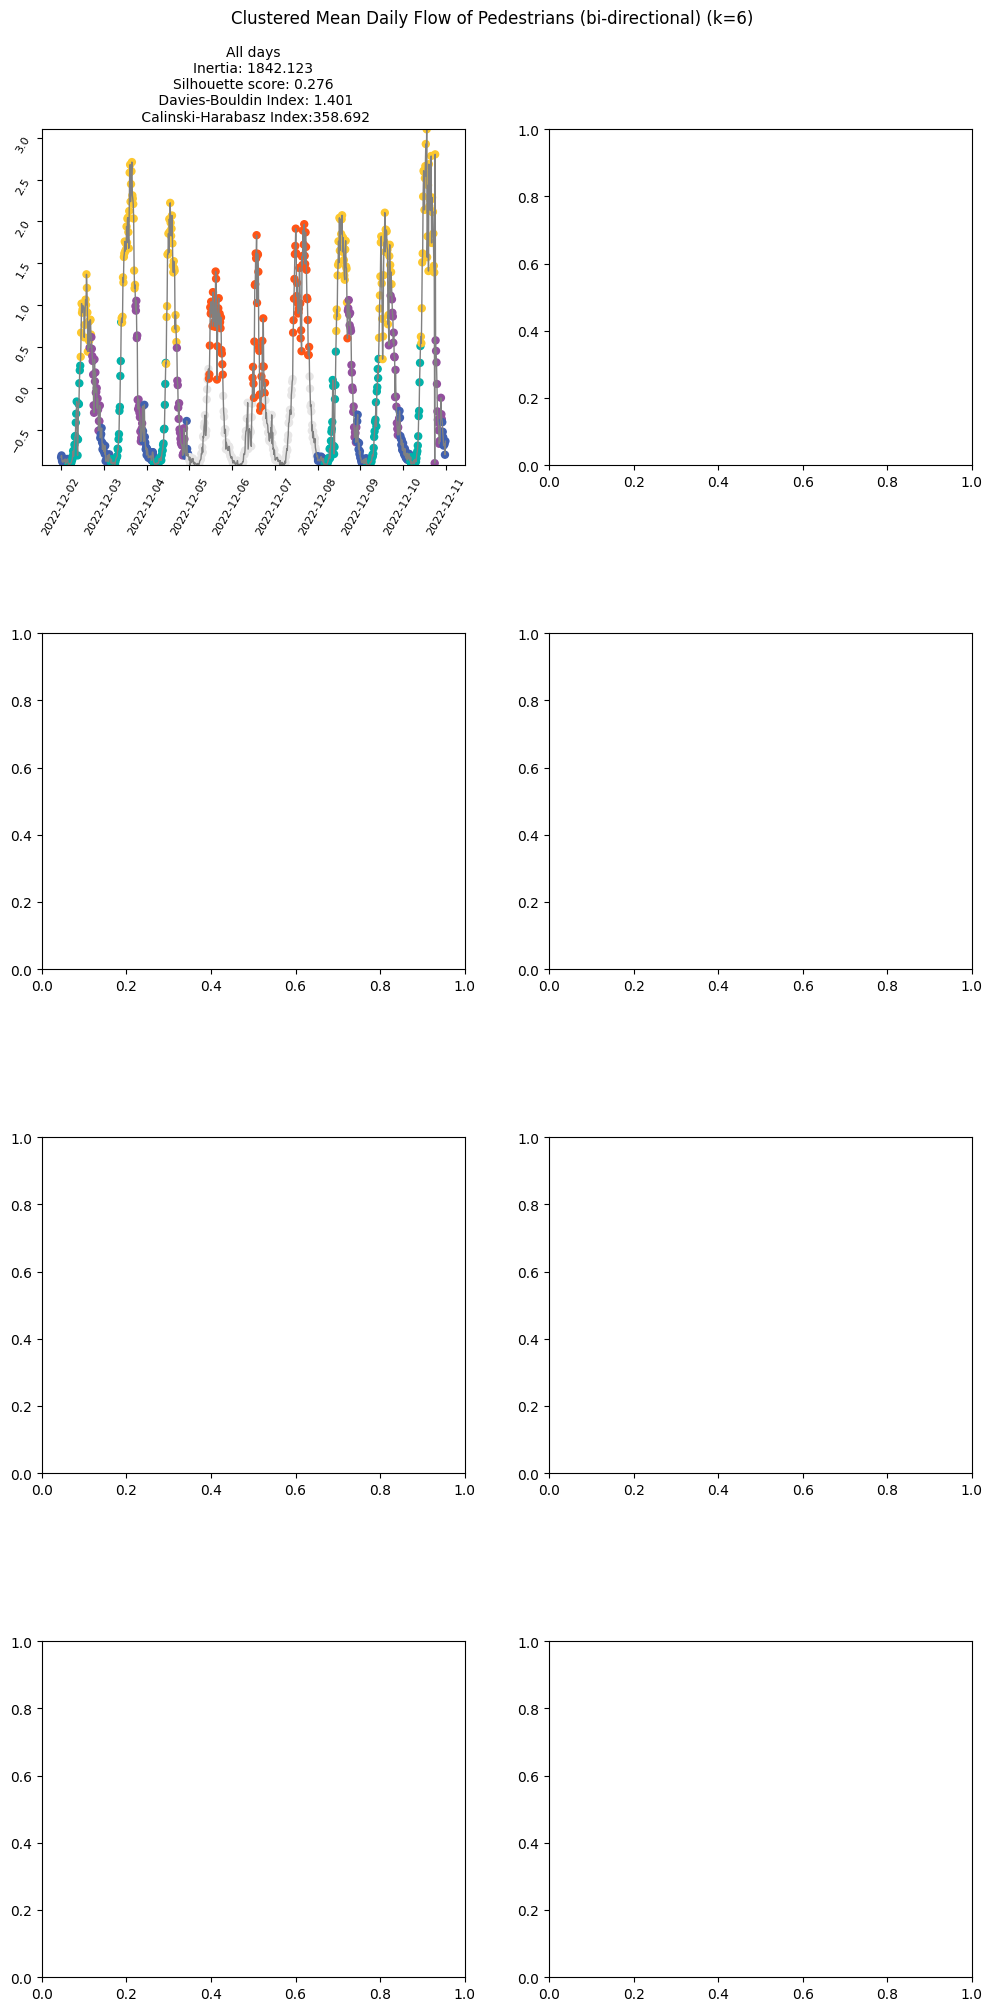

In [ ]:
N_CLUSTERS = 6

fig, ax = plt.subplots(4, 2, figsize=(12, 24))
fig.suptitle(
    f"Clustered Mean Daily Flow of Pedestrians (bi-directional) (k={N_CLUSTERS})",
    y=0.93,
)
fig.subplots_adjust(hspace=0.5)

# list weekday names
days_of_week = list(calendar.day_name)

# perform k-means clustering on the entire data
west_dict = preprocess_data(
    west_df, completeness_threshold=1, additional_features=["day_in_week", "date"]
)

all_X, all_X_index, all_X_columns = (
    west_dict["data"],
    west_dict["index"],
    west_dict["columns"],
)

kmeans = KMeans(n_clusters=N_CLUSTERS, n_init=10)
kmeans.fit(all_X)
all_labels = kmeans.predict(all_X)
all_centroids = kmeans.cluster_centers_

# determine the overall min and max y-values across all the data
y_min = np.min(all_X[:, 0])
y_max = np.max(all_X[:, 0])

# set the cluster colors
cmap = ListedColormap(custom_palette[:N_CLUSTERS])
all_label_colors = cmap(all_labels)

# plot all days first at ax[0,0]
ax[0, 0].plot(all_X_index, all_X[:, 0], c="gray", linewidth=1)
ax[0, 0].scatter(all_X_index, all_X[:, 0], c=all_label_colors, s=25)
ax[0, 0].set_title(
    f"All days\nInertia: {kmeans.inertia_:.3f}\nSilhouette score: {silhouette_score(all_X, all_labels):.3f}\n Davies-Bouldin Index: {davies_bouldin_score(all_X, all_labels):.3f}\n Calinski-Harabasz Index:{calinski_harabasz_score(all_X, all_labels):.3f}",
    fontsize=10,
)
ax[0, 0].tick_params(labelrotation=60, labelsize=8)
ax[0, 0].set_ylim(y_min, y_max)  # set consistent y-limits

# start plotting the rest of the days starting from ax[0,1]
df = pd.DataFrame(all_X, index=all_X_index, columns=all_X_columns)
split_df = df.index.astype(str).str.split(" ", expand=True)
split_df = pd.DataFrame(split_df.tolist(), columns=["date", "time"], index=df.index)
df["date"] = split_df["date"]
df["time"] = split_df["time"]

for i in range(7):
    df = df[df["day_in_week"] == i % 7]
    dictionary = preprocess_data(
        west_df,
        completeness_threshold=1,
        frequency="D",
        additional_features=["day_in_week", "date"],
        consecutive_days=False,
        resample=True,
    )

    X, X_index, X_columns = (
        dictionary["data"],
        dictionary["index"],
        dictionary["columns"],
    )

    # use labels from the entire data for consistency
    labels = all_labels[all_X_index.isin(X_index)]
    label_colors = all_label_colors[all_X_index.isin(X_index)]

    ax[(i + 1) // 2, (i + 1) % 2].plot(X_index, X[:, 0], c="gray", linewidth=1)
    ax[(i + 1) // 2, (i + 1) % 2].scatter(X_index, X[:, 0], c=label_colors, s=50)
    ax[(i + 1) // 2, (i + 1) % 2].set_title(
        f"{days_of_week[i % 7]}s\nInertia: {kmeans.inertia_:.3f}\nSilhouette score: {silhouette_score(X, labels):.3f}\n Davies-Bouldin Index: {davies_bouldin_score(X, labels):.3f}\n Calinski-Harabasz Index:{calinski_harabasz_score(X, labels):.3f}",
        fontsize=10,
    )
    ax[(i + 1) // 2, (i + 1) % 2].tick_params(labelrotation=60, labelsize=8)
    ax[(i + 1) // 2, (i + 1) % 2].set_ylim(y_min, y_max)  # set consistent y-limits

plt.savefig(
    os.path.join(
        OUTPUT_FIGURES_PATH, f"Clustering daily mean flow of pedestrians (by day).svg"
    ),
    bbox_inches="tight",
    dpi=200,
)

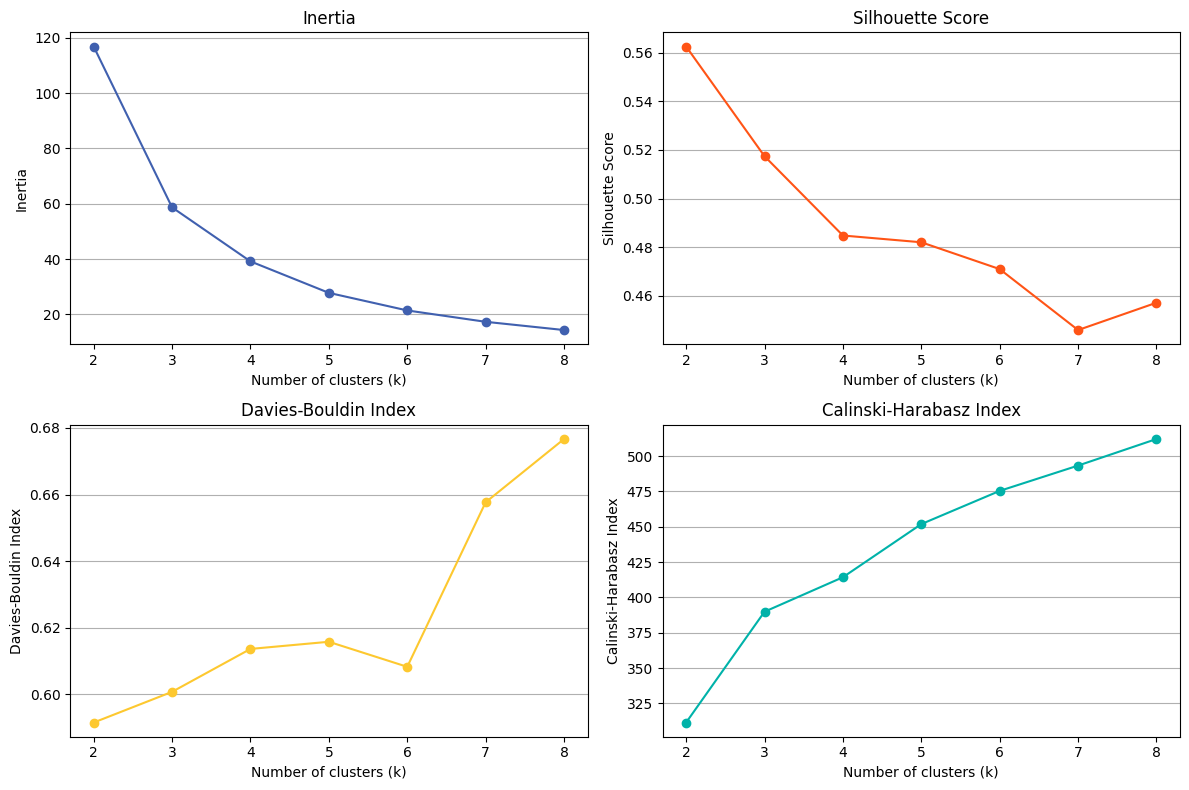

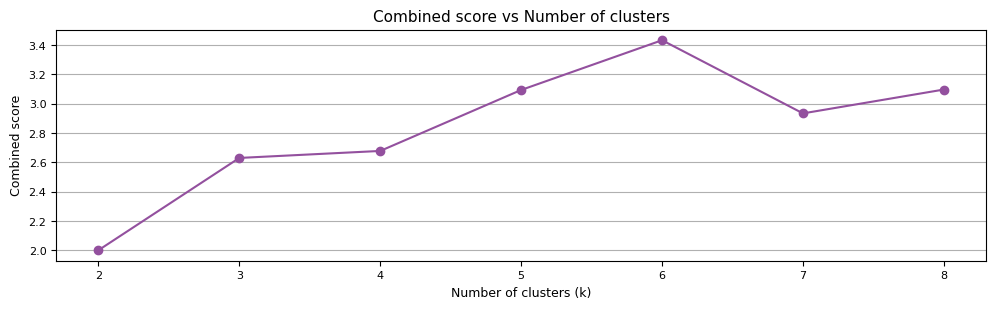

In [ ]:
# perform k-means clustering on the entire data
all_X, all_X_index, all_X_columns = aggregate_and_preprocess_daily_data(
    west_complete_days_df
)

results = []
k_values = range(2, 9)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(all_X)
    labels = kmeans.predict(all_X)

    inertia = kmeans.inertia_
    silhouette = silhouette_score(all_X, labels)
    dbi = davies_bouldin_score(all_X, labels)
    chi = calinski_harabasz_score(all_X, labels)

    results.append(
        {"k": k, "inertia": inertia, "silhouette": silhouette, "dbi": dbi, "chi": chi}
    )

# convert results to DataFrame
df_results = pd.DataFrame(results)

# plot the four indices
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].plot(df_results["k"], df_results["inertia"], marker="o", c=custom_palette[0])
axs[0, 0].set_title("Inertia")
axs[0, 0].set_xlabel("Number of clusters (k)")
axs[0, 0].set_ylabel("Inertia")
axs[0, 0].grid(True, which="major", axis="y")

axs[0, 1].plot(
    df_results["k"], df_results["silhouette"], marker="o", c=custom_palette[1]
)
axs[0, 1].set_title("Silhouette Score")
axs[0, 1].set_xlabel("Number of clusters (k)")
axs[0, 1].set_ylabel("Silhouette Score")
axs[0, 1].grid(True, which="major", axis="y")

axs[1, 0].plot(df_results["k"], df_results["dbi"], marker="o", c=custom_palette[2])
axs[1, 0].set_title("Davies-Bouldin Index")
axs[1, 0].set_xlabel("Number of clusters (k)")
axs[1, 0].set_ylabel("Davies-Bouldin Index")
axs[1, 0].grid(True, which="major", axis="y")

axs[1, 1].plot(df_results["k"], df_results["chi"], marker="o", c=custom_palette[3])
axs[1, 1].set_title("Calinski-Harabasz Index")
axs[1, 1].set_xlabel("Number of clusters (k)")
axs[1, 1].set_ylabel("Calinski-Harabasz Index")
axs[1, 1].grid(True, which="major", axis="y")

fig.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_FIGURES_PATH, f"Clustering scores.svg"),
    bbox_inches="tight",
    dpi=200,
)
plt.show()

# show combined plots
from sklearn.preprocessing import MinMaxScaler

# initialize the MinMaxScaler
scaler = MinMaxScaler()

# fit and transform the data
df_normalized = pd.DataFrame(
    scaler.fit_transform(df_results), columns=df_results.columns, index=df_results.index
)

# we have to maximize silhouette and calinski_harabasz,
# and minimize inertia and davies_bouldin for our clustering to be good.
# therefore, we subtract inertia and davies_bouldin from 1 after normalization.
df_normalized["inertia"] = 1 - df_normalized["inertia"]
df_normalized["dbi"] = 1 - df_normalized["dbi"]

# sum the normalized scores across each row (i.e., for each cluster size)
df_normalized["combined"] = df_normalized.sum(axis=1)

# plot the combined score for each number of clusters
plt.figure(figsize=(12, 3))
plt.plot(
    df_results.index + 2, df_normalized["combined"], marker="o", c=custom_palette[5]
)
plt.xlabel("Number of clusters (k)", fontsize=9)
plt.ylabel("Combined score", fontsize=9)
plt.title("Combined score vs Number of clusters", fontsize=11)
plt.grid(True, which="major", axis="y")
plt.tick_params(labelsize=8)
plt.savefig(
    os.path.join(
        OUTPUT_FIGURES_PATH,
        f"Combined clustering score (normalised and unweighted).svg",
    ),
    bbox_inches="tight",
    dpi=200,
)
plt.show()

## References

```{bibliography}
:filter: docname in docnames
```